In [254]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import ComplementNB,GaussianNB
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import auc
import time
import warnings
import os
import pickle
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from scipy.stats import ttest_ind
from scipy import interp
from imblearn.under_sampling import EditedNearestNeighbours

from warnings import filterwarnings
filterwarnings('ignore')

# Data Loading

In [13]:
df = pd.read_csv("./dataset_diabetes/diabetic_data.csv")
df


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [14]:
#checking the name of the features
col=df.columns.tolist()
col

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

# Distribution of our class label

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64


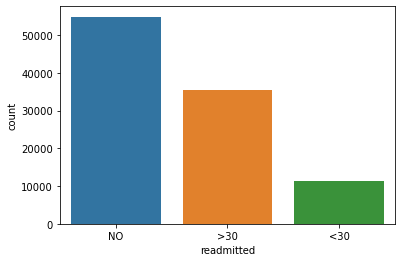

In [15]:
print(df.groupby(df["readmitted"]).size())
sns.countplot(df['readmitted'],label="Count")

Class summary in each feature

In [16]:
# for each column
for cols in list(df.columns):
    
    # get a list of unique values
    n = df[cols].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(cols)
        print(n)
    else:
        print(cols + ': ' +str(len(n)) + ' unique values')

encounter_id: 101766 unique values
patient_nbr: 71518 unique values
race
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender
['Female' 'Male' 'Unknown/Invalid']
age
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id
[6 1 2 3 4 5 8 7]
discharge_disposition_id
[25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
admission_source_id
[ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
time_in_hospital
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty: 73 unique values
num_lab_procedures: 118 unique values
num_procedures
[0 5 1 6 2 3 4]
num_medications: 75 unique values
number_outpatient: 39 unique values
number_emergency: 33 unique values
number_inpatient

Missing value check

In [17]:
def missing_value_check(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data)

#missing data
df=df.replace('?', np.nan)
missing_value_check(df)

                          Total   Percent
weight                    98569  0.968585
medical_specialty         49949  0.490822
payer_code                40256  0.395574
race                       2273  0.022336
diag_3                     1423  0.013983
diag_2                      358  0.003518
diag_1                       21  0.000206
num_procedures                0  0.000000
max_glu_serum                 0  0.000000
number_diagnoses              0  0.000000
number_inpatient              0  0.000000
number_emergency              0  0.000000
number_outpatient             0  0.000000
num_medications               0  0.000000
readmitted                    0  0.000000
num_lab_procedures            0  0.000000
diabetesMed                   0  0.000000
time_in_hospital              0  0.000000
admission_source_id           0  0.000000
discharge_disposition_id      0  0.000000
admission_type_id             0  0.000000
age                           0  0.000000
gender                        0  0

gender was coded differently so we use a custom count for this one   

In [18]:
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count()) 

gender 3


# Missing Value handling

Deleting rows related to the death and hospice based on the IDs_mapping.csv

In [19]:
df = df.loc[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


removing invalid/unknown entries for gender

In [20]:
df=df[df['gender']!='Unknown/Invalid']
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


removing invalid/unknown entries for gender

In [21]:
df=df[df['gender']!='Unknown/Invalid']
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


race and medical_specialty have missing data. elimating missing values of Race might create a bias towards specific races which is not preferable. And we don't want to miss out any unknown medical_speciality which might have missed out due to technical errors. So, it is better to replce the missing values withn 'UNK'. Weight has high percentage of missing value. So, instead of imputing this column it is better to drop this column. Then, payer code also has a high percentage of missing values and it it not important in case of readmission prediction.Missing rows of diagonosis has been removed .


In [22]:
pd.options.mode.chained_assignment = None
df.race = df.race.fillna('UNK')
# #df.payer_code = df.payer_code.fillna('UNK')
df.medical_specialty = df.medical_specialty.fillna('UNK')

dropping columns with high NA percentage

In [23]:
df.drop(['weight','payer_code'],axis=1,inplace=True)

dropping rows of diag-1,diag-2, diag-3.

In [24]:
df.dropna(inplace=True)

Checking the missing values to see whehter any missing values left to handle or not.

In [25]:
missing_value_check(df)

df.shape

                          Total  Percent
readmitted                    0      0.0
diabetesMed                   0      0.0
A1Cresult                     0      0.0
max_glu_serum                 0      0.0
number_diagnoses              0      0.0
diag_3                        0      0.0
diag_2                        0      0.0
diag_1                        0      0.0
number_inpatient              0      0.0
number_emergency              0      0.0
number_outpatient             0      0.0
num_medications               0      0.0
num_procedures                0      0.0
num_lab_procedures            0      0.0
medical_specialty             0      0.0
time_in_hospital              0      0.0
admission_source_id           0      0.0
discharge_disposition_id      0      0.0
admission_type_id             0      0.0
age                           0      0.0
gender                        0      0.0
race                          0      0.0
patient_nbr                   0      0.0
metformin       

(97822, 48)

# Feature Engineering

In [26]:
# dropping columns related to IDs
df.drop(['encounter_id','patient_nbr'],axis=1,inplace=True)
df.shape

(97822, 46)

Investigating the medical_speciality column

In [27]:
print('Number medical specialty:', df.medical_specialty.nunique())
print(df.groupby('medical_specialty').size().sort_values(ascending = False)[0:40])

Number medical specialty: 73
medical_specialty
UNK                                  48149
InternalMedicine                     13987
Emergency/Trauma                      7350
Family/GeneralPractice                7111
Cardiology                            5247
Surgery-General                       2984
Nephrology                            1527
Orthopedics                           1366
Orthopedics-Reconstructive            1182
Radiologist                           1119
Pulmonology                            845
Psychiatry                             844
ObstetricsandGynecology                652
Urology                                646
Surgery-Cardiovascular/Thoracic        636
Gastroenterology                       534
Surgery-Vascular                       516
Surgery-Neuro                          430
PhysicalMedicineandRehabilitation      391
Oncology                               316
Pediatrics                             205
Neurology                              197
Hematol

There are 73 unique features of the medical speciality. And almost half of them are unknowns. And some of them very instanecs. In this project top 10 classes are being taken and rest of the classes are labeled as 'Other' here.


In [28]:
top_10 = ['UNK','InternalMedicine','Emergency/Trauma',\
          'Family/GeneralPractice', 'Cardiology','Surgery-General' ,\
          'Nephrology','Orthopedics',\
          'Orthopedics-Reconstructive','Radiologist']

# make a new column with duplicated data
df['med_spec'] = df['medical_specialty'].copy()

# replace all specialties not in top 10 with 'Other' category
df.loc[~df.med_spec.isin(top_10),'med_spec'] = 'Other'

df.drop('medical_specialty',axis=1,inplace=True)

df.groupby('med_spec').size()

med_spec
Cardiology                     5247
Emergency/Trauma               7350
Family/GeneralPractice         7111
InternalMedicine              13987
Nephrology                     1527
Orthopedics                    1366
Orthopedics-Reconstructive     1182
Other                          7800
Radiologist                    1119
Surgery-General                2984
UNK                           48149
dtype: int64

Grouping of the diag_1, diag_2, diag_3

First converted the value started with E, V with a dash then converted a numeric value 250 as a string then converted all the values into float. Then it has been grouped as Diabetes, Circulatory, Respitratory, Digestive, Genitourinary, Injury, Muscoloskeletal, Neoplasms, Others based on the original papers.


In [29]:
diag_cols = ['diag_1','diag_2','diag_3']
for col in diag_cols:
    df[col] = df[col].str.replace('E','-')
    df[col] = df[col].str.replace('V','-')
    condition = df[col].str.contains('250')
    df.loc[condition,col] = '250'

df[diag_cols] = df[diag_cols].astype(float)

In [30]:
# diagnosis grouping
for col in diag_cols:
    #creating an extra column consist of nan this will help us to categories others later
    df['temp']=np.nan
    condition = df[col]==250
    df.loc[condition,'temp']='Diabetes'
    
    condition = (df[col]>=390) & (df[col]<=458) | (df[col]==785)
    df.loc[condition,'temp']='Circulatory'
    
    condition = (df[col]>=460) & (df[col]<=519) | (df[col]==786)
    df.loc[condition,'temp']='Respiratory'
    
    condition = (df[col]>=520) & (df[col]<=579) | (df[col]==787)
    df.loc[condition,'temp']='Digestive'
    
    condition = (df[col]>=580) & (df[col]<=629) | (df[col]==788)
    df.loc[condition,'temp']='Genitourinary'
    
    condition = (df[col]>=800) & (df[col]<=999)
    df.loc[condition,'temp']='Injury'
    
    condition = (df[col]>=710) & (df[col]<=739)
    df.loc[condition,'temp']='Muscoloskeletal'
    
    condition = (df[col]>=140) & (df[col]<=239)
    df.loc[condition,'temp']='Neoplasms'
    
    #converting all the rest values as Other
    condition = df[col]==0
    df.loc[condition,col]='?'
    df['temp']=df['temp'].fillna('Others')
    condition = df['temp']=='0'
    df.loc[condition,'temp']=np.nan
    #Replaceing temp in place of diagonisis
    df[col]=df['temp']
    df.drop('temp',axis=1,inplace=True)
#Droping the temp column
df.dropna(inplace=True)

In [31]:
df.shape

(97822, 46)

In [32]:
df.groupby(df["diag_1"]).size()

diag_1
Circulatory        29455
Diabetes            8039
Digestive           9221
Genitourinary       4960
Injury              6713
Muscoloskeletal     4836
Neoplasms           3088
Others             17693
Respiratory        13817
dtype: int64

Converting the numeric attributes into categorical.Because from the IDs_mapping.csv file we can see that these attributes are not representing a number. They are representing an indiviual entity.


In [33]:
cols_cat_num = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

df[cols_cat_num] = df[cols_cat_num].astype('str')

Age Has been given based on range. So, lets convert it into an ordinal number.

In [35]:
df["age"].value_counts()

[70-80)     25159
[60-70)     21864
[50-60)     16849
[80-90)     16328
[40-50)      9396
[30-40)      3605
[90-100)     2582
[20-30)      1507
[10-20)       468
[0-10)         64
Name: age, dtype: int64

In [36]:
labels = df['age'].astype('category').cat.categories.tolist()
replace_age = {'age' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

df.replace(replace_age, inplace=True)

df.age.value_counts()

8     25159
7     21864
6     16849
9     16328
5      9396
4      3605
10     2582
3      1507
2       468
1        64
Name: age, dtype: int64

A1Cresult has 4 categorical values None, Norm, >7 ,  >8 Which looks like an ordinal feature. Because of that converting that categorical values into ordinal number. Then, Change and diabetesMed have two values (no&change) and (No, Yes). This can be encoded as -1 and 1. 24 drugs have 4 types of value Up, Down , Steady, No. Lets convert them into ordinal value because of their ordinal nature. 


In [37]:
A1Cresult_dict = {'None':0,
                  'Norm':5,
                  '>7':7,
                  '>8':8
                 }
df['A1Cresult'] = df['A1Cresult'].replace(A1Cresult_dict)

change_dict = {'No':-1,
               'Ch':1
              }
df['change'] = df['change'].replace(change_dict)

diabetesMed_dict = {'No':-1,
                    'Yes':1
                   }
df['diabetesMed'] = df['diabetesMed'].replace(diabetesMed_dict)
drugs_dict = {'Up':10,
        'Down':-10,
        'Steady':0,
        'No':-20
        }

drugs = ['metformin','repaglinide','nateglinide','chlorpropamide',
 'glimepiride','acetohexamide','glipizide','glyburide',
 'tolbutamide','pioglitazone','rosiglitazone','acarbose',
 'miglitol','troglitazone','tolazamide','examide',
 'citoglipton','insulin','glyburide-metformin','glipizide-metformin',
 'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']
for col in drugs:
    df[col] = df[col].replace(drugs_dict)


Seperating the label from the dataset

In [38]:
y = df.readmitted
x = df.drop('readmitted',axis=1)


# One-Hot encoding

one-hot encoding applied on the categorical features of the datasets.

In [39]:
cat_cols = list(df.select_dtypes('object').columns)
cat_cols.remove('readmitted')
cat_cols


['race',
 'gender',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'med_spec']

In [40]:
x=pd.get_dummies(x, columns=cat_cols)
x

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,A1Cresult,...,med_spec_Emergency/Trauma,med_spec_Family/GeneralPractice,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,med_spec_UNK
1,2,3,59,0,18,0,0,0,9,0,...,0,0,0,0,0,0,0,0,0,1
2,3,2,11,5,13,2,0,1,6,0,...,0,0,0,0,0,0,0,0,0,1
3,4,2,44,1,16,0,0,0,7,0,...,0,0,0,0,0,0,0,0,0,1
4,5,1,51,0,8,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,1
5,6,3,31,6,16,0,0,0,9,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,8,3,51,0,16,0,0,0,9,8,...,0,0,0,0,0,0,0,0,0,1
101762,9,5,33,3,18,0,0,1,9,0,...,0,0,0,0,0,0,0,0,0,1
101763,8,1,53,0,9,1,0,0,13,0,...,0,0,0,0,0,0,0,0,0,1
101764,9,10,45,2,21,0,0,1,9,0,...,0,0,0,0,0,0,0,0,1,0


Splitting for the k folds crossvalidation.

In [41]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

Function for the statistical significance

In [42]:
def statitical_significance(clf1_acc,clf2_acc,semi_supervised=False):
    if (semi_supervised==True):
        t,pvalue=ttest_ind(clf1_acc,clf2_acc,equal_var=False)
    else:
        t,pvalue=ttest_ind(clf1_acc,clf2_acc,equal_var=True)
    print(f'The P-value is = {pvalue}')
    print(f'The t-statistics is = {t}')
    if pvalue <= 0.05:
        print('Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.')
    else:
        print('Since p>0.05, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.')

Function for calculating the Results.

In [101]:
def Results(cnf_matrix):
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)
    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    # Overall accuracy for each class
    ACC = (TP+TN)/(TP+FP+FN+TN)
    #Overall F1_socre
    f_score = np.zeros(3)
    if(((PPV+TPR)>0).all()):
        f_score = (2*PPV*TPR)/(PPV+TPR) 
    else:
        for i in range(3):
            if((PPV[i]+TPR[i])==0):
                f_score[i] = 0
            else: 
                f_score[i] = (2*PPV[i]*TPR[i])/(PPV[i]+TPR[i]) 
    return ACC,TPR,TNR,PPV,f_score

# Part B

Semi-supervised learning

In [127]:
df =pd.concat([x,y],axis=1)
df

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,A1Cresult,...,med_spec_Family/GeneralPractice,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,med_spec_UNK,readmitted
1,2,3,59,0,18,0,0,0,9,0,...,0,0,0,0,0,0,0,0,1,>30
2,3,2,11,5,13,2,0,1,6,0,...,0,0,0,0,0,0,0,0,1,NO
3,4,2,44,1,16,0,0,0,7,0,...,0,0,0,0,0,0,0,0,1,NO
4,5,1,51,0,8,0,0,0,5,0,...,0,0,0,0,0,0,0,0,1,NO
5,6,3,31,6,16,0,0,0,9,0,...,0,0,0,0,0,0,0,0,1,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,8,3,51,0,16,0,0,0,9,8,...,0,0,0,0,0,0,0,0,1,>30
101762,9,5,33,3,18,0,0,1,9,0,...,0,0,0,0,0,0,0,0,1,NO
101763,8,1,53,0,9,1,0,0,13,0,...,0,0,0,0,0,0,0,0,1,NO
101764,9,10,45,2,21,0,0,1,9,0,...,0,0,0,0,0,0,0,1,0,NO


This function is being used to generate labeled and unlabeled data based on the given percentage. Here test dataset will always remain same to keep the consistency.

In [128]:
def dataset_creation(df,percentage=10):
    # Generate indices for splits

    test_ind = round(len(df)*0.20)
    #calculating the the remaining indices
    rem = len(df)-test_ind
    unlabeled_ind = test_ind + round((rem/100)*percentage)
    rem1 = round((rem/100)*percentage)
    train_ind = unlabeled_ind + round(rem-rem1)


    # Partition the data

    test = df.iloc[:test_ind]
    unlabeled = df.iloc[test_ind:unlabeled_ind]
    train = df.iloc[unlabeled_ind:train_ind]
    
    return test,train,unlabeled

This is the function of the selftraining. It takes three parameters such as the dataset, the percentage of the unlabeled data and the max_iter which works as a stoping criteria.

In [129]:
def self_training_classification(df,percentage,max_iter):
    
    #Creating labelled and unlabeled data based on the percentage 
    #Testing data remained same to make it consistent
    test,train,unlabeled=dataset_creation(df,percentage)
    
    # Assign data to train, test, and unlabeled sets

    X_train = train.drop('readmitted', axis=1)
    y_train = train.readmitted

    X_unlabeled = unlabeled.drop('readmitted', axis=1)

    X_test = test.drop('readmitted', axis=1)
    y_test = test.readmitted


    # Check dimensions of data after splitting

    print(f"X_train dimensions: {X_train.shape}")
    print(f"y_train dimensions: {y_train.shape}\n")

    print(f"X_test dimensions: {X_test.shape}")
    print(f"y_test dimensions: {y_test.shape}\n")

    print(f"X_unlabeled dimensions: {X_unlabeled.shape}")
    
    
    # Initiate iteration counter
    iterations = 0

    # Containers to hold f1_scores and # of pseudo-labels
    acc = []
    rec = []
    prec=[]
    spec=[]
    f1= []
    pseudo_labels = []

    # Assign value to initiate while loop
    high_prob = [1] 
    start_time = time.time()
    
    # Loop will run until there are no more high-probability pseudo-labels
    while len(high_prob) > 0 and iterations<=max_iter:

        # Fit classifier and make train/test predictions
        #clf = xgb.XGBClassifier(n_estimators = 500, max_depth = 30, learning_rate = 0.01)
        #clf = tree.DecisionTreeClassifier(random_state=10)
        clf = MLPClassifier(max_iter=200,verbose=False)
        clf.fit(X_train, y_train)
        y_hat_test = clf.predict(X_test)

        # Calculate and print iteration # and all the evaluating metrics, and store all the evaluating metrics
        cnf_matrix_selftraining = confusion_matrix(y_test, y_hat_test)
        acc_selftraining,rec_selftraining,spec_selftraining,prec_selftraining,f1_selftraining=Results(cnf_matrix_selftraining) 
        print(f"Iteration {iterations}")
        print(f"Accuracy: {np.mean(acc_selftraining)}")
        print(f"Recall: {np.mean(rec_selftraining)}")
        print(f"Specificity: {np.mean(spec_selftraining)}")
        print(f"Precision: {np.mean(prec_selftraining)}")
        print(f"f1_score: {np.mean(f1_selftraining)}")
        
        acc.append(acc_selftraining)
        rec.append(rec_selftraining)
        prec.append(prec_selftraining)
        spec.append(spec_selftraining)
        f1.append(f1_selftraining)

        # Generate predictions and probabilities for unlabeled data
        print(f"Now predicting labels for unlabeled data...")

        pred_probs = clf.predict_proba(X_unlabeled)
        preds = clf.predict(X_unlabeled)
        prob_0 = pred_probs[:,0]
        prob_1 = pred_probs[:,1]
        prob_2 = pred_probs[:,2]

        # Store predictions and probabilities in dataframe
        df_pred_prob = pd.DataFrame([])
        df_pred_prob['preds'] = preds
        df_pred_prob['prob_0'] = prob_0
        df_pred_prob['prob_1'] = prob_1
        df_pred_prob['prob_2'] = prob_2
        df_pred_prob.index = X_unlabeled.index

        # Separate predictions with > 99% probability
        high_prob = pd.concat([df_pred_prob.loc[df_pred_prob['prob_0'] > 0.99],
                               df_pred_prob.loc[df_pred_prob['prob_1'] > 0.99],
                               df_pred_prob.loc[df_pred_prob['prob_2'] > 0.99]],
                              axis=0)

        print(f"{len(high_prob)} high-probability predictions added to training data.")

        pseudo_labels.append(len(high_prob))

        # Add pseudo-labeled data to training data
        X_train = pd.concat([X_train, X_unlabeled.loc[high_prob.index]], axis=0)
        y_train = pd.concat([y_train, high_prob.preds])      

        # Drop pseudo-labeled instances from unlabeled data
        X_unlabeled = X_unlabeled.drop(index=high_prob.index)
        print(f"{len(X_unlabeled)} unlabeled instances remaining.\n")

        # Update iteration counter
        iterations += 1
    
    if(iterations>max_iter):
        print("Training ended because of the max iterations")
    else:
        print("Traning ended because there are no more high probability values left")
    total_time = time.time() - start_time     
    return acc,rec,spec,prec,f1,clf,df_pred_prob,pseudo_labels,iterations,total_time


Setting a max_iter value to end the loop

In [130]:
max_iter = 50

Now self-training classifier will be trained against different types of unlabeled data. A summarize results will be shown later.

# Self-Training 10%

In [126]:
%%time
acc_selftraining10,rec_selftraining10,spec_selftraining10,prec_selftraining10,f1_selftraining10,clf_selftraining10,df_pred_prob_selftraining10,pseudo_labels_selftraining10,iterations_selftraining10,time_selftraining10 =self_training_classification(df,10,max_iter) 

X_train dimensions: (70432, 131)
y_train dimensions: (70432,)

X_test dimensions: (19564, 131)
y_test dimensions: (19564,)

X_unlabeled dimensions: (7826, 131)
Iteration 0
Accuracy: 0.697607851155183
Recall: 0.3841689894644747
Specificity: 0.7030785323949577
Precision: 0.4475065876591158
f1_score: 0.350348452322441
Now predicting labels for unlabeled data...
5 high-probability predictions added to training data.
7821 unlabeled instances remaining.

Iteration 1
Accuracy: 0.6948817556055339
Recall: 0.37749544886936737
Specificity: 0.699310962300811
Precision: 0.4351086496770753
f1_score: 0.33885664150084355
Now predicting labels for unlabeled data...
14 high-probability predictions added to training data.
7807 unlabeled instances remaining.

Iteration 2
Accuracy: 0.6772643631159272
Recall: 0.382764957641576
Specificity: 0.7005523007174519
Precision: 0.40796722713721456
f1_score: 0.3646425835013385
Now predicting labels for unlabeled data...
3 high-probability predictions added to trainin

# Self-Training 20%

In [131]:
acc_selftraining20,rec_selftraining20,spec_selftraining20,prec_selftraining20,f1_selftraining20,clf_selftraining20,df_pred_prob_selftraining20,pseudo_labels_selftraining20,iterations_selftraining20,time_selftraining20 =self_training_classification(df,20,max_iter) 

X_train dimensions: (62606, 131)
y_train dimensions: (62606,)

X_test dimensions: (19564, 131)
y_test dimensions: (19564,)

X_unlabeled dimensions: (15652, 131)
Iteration 0
Accuracy: 0.6980167654876303
Recall: 0.3929942149363359
Specificity: 0.7117643147270477
Precision: 0.4366448559996947
f1_score: 0.37337029582979064
Now predicting labels for unlabeled data...
2 high-probability predictions added to training data.
15650 unlabeled instances remaining.

Iteration 1
Accuracy: 0.6942343079124923
Recall: 0.38420477908724976
Specificity: 0.7032422515018683
Precision: 0.43307482290913635
f1_score: 0.3575894651703124
Now predicting labels for unlabeled data...
24 high-probability predictions added to training data.
15626 unlabeled instances remaining.

Iteration 2
Accuracy: 0.6855108021536154
Recall: 0.3914434923362439
Specificity: 0.705854466157236
Precision: 0.4172703470117895
f1_score: 0.3787720874739959
Now predicting labels for unlabeled data...
12 high-probability predictions added to 

Iteration 27
Accuracy: 0.6851700402099093
Recall: 0.3850679163754651
Specificity: 0.7035039127721371
Precision: 0.4095017417191353
f1_score: 0.37064002643860094
Now predicting labels for unlabeled data...
55 high-probability predictions added to training data.
12751 unlabeled instances remaining.

Iteration 28
Accuracy: 0.6868056975396989
Recall: 0.38708106546959037
Specificity: 0.7060435525383242
Precision: 0.40872412592275076
f1_score: 0.3736972940716717
Now predicting labels for unlabeled data...
90 high-probability predictions added to training data.
12661 unlabeled instances remaining.

Iteration 29
Accuracy: 0.6897703264499421
Recall: 0.38625074503259355
Specificity: 0.7050224284662869
Precision: 0.41835386719830114
f1_score: 0.3687572426751031
Now predicting labels for unlabeled data...
51 high-probability predictions added to training data.
12610 unlabeled instances remaining.

Iteration 30
Accuracy: 0.690042936004907
Recall: 0.3951159168070584
Specificity: 0.7113574338524887
P

# Self-Training 50%

In [137]:
acc_selftraining50,rec_selftraining50,spec_selftraining50,prec_selftraining50,f1_selftraining50,clf_selftraining50,df_pred_prob_selftraining50,pseudo_labels_selftraining50,iterations_selftraining50,time_selftraining50 =self_training_classification(df,50,max_iter) 

X_train dimensions: (39129, 131)
y_train dimensions: (39129,)

X_test dimensions: (19564, 131)
y_test dimensions: (19564,)

X_unlabeled dimensions: (39129, 131)
Iteration 0
Accuracy: 0.6800245348599468
Recall: 0.37601014025631524
Specificity: 0.695727388968849
Precision: 0.4031777455957049
f1_score: 0.35474674893686053
Now predicting labels for unlabeled data...
32 high-probability predictions added to training data.
39097 unlabeled instances remaining.

Iteration 1
Accuracy: 0.67797996319771
Recall: 0.38110640052005745
Specificity: 0.6998909605658715
Precision: 0.40201602215865284
f1_score: 0.3649341921670648
Now predicting labels for unlabeled data...
88 high-probability predictions added to training data.
39009 unlabeled instances remaining.

Iteration 2
Accuracy: 0.670244667075581
Recall: 0.37947408966316337
Specificity: 0.6963649927070096
Precision: 0.3981314285762256
f1_score: 0.3669019960818633
Now predicting labels for unlabeled data...
126 high-probability predictions added to

Iteration 27
Accuracy: 0.6750153342874669
Recall: 0.37371108614859505
Specificity: 0.6944958030979209
Precision: 0.39470701179192264
f1_score: 0.35255749262867814
Now predicting labels for unlabeled data...
16 high-probability predictions added to training data.
33223 unlabeled instances remaining.

Iteration 28
Accuracy: 0.6782184965583044
Recall: 0.3665020832091328
Specificity: 0.689945232851186
Precision: 0.3976537123296175
f1_score: 0.33070532379104206
Now predicting labels for unlabeled data...
82 high-probability predictions added to training data.
33141 unlabeled instances remaining.

Iteration 29
Accuracy: 0.67631022967355
Recall: 0.3681785579159251
Specificity: 0.6877384313029604
Precision: 0.4029737666989901
f1_score: 0.33046364236511044
Now predicting labels for unlabeled data...
20 high-probability predictions added to training data.
33121 unlabeled instances remaining.

Iteration 30
Accuracy: 0.683091392353302
Recall: 0.3716010089504616
Specificity: 0.6927920796650667
Prec

# Self-Training 90%

In [138]:
acc_selftraining90,rec_selftraining90,spec_selftraining90,prec_selftraining90,f1_selftraining90,clf_selftraining90,df_pred_prob_selftraining90,pseudo_labels_selftraining90,iterations_selftraining90,time_selftraining90 =self_training_classification(df,90,max_iter) 

X_train dimensions: (7826, 131)
y_train dimensions: (7826,)

X_test dimensions: (19564, 131)
y_test dimensions: (19564,)

X_unlabeled dimensions: (70432, 131)
Iteration 0
Accuracy: 0.6876235262045934
Recall: 0.355398278381585
Specificity: 0.6855113966584628
Precision: 0.37708448204266176
f1_score: 0.29178419821313545
Now predicting labels for unlabeled data...
10 high-probability predictions added to training data.
70422 unlabeled instances remaining.

Iteration 1
Accuracy: 0.6893954883118654
Recall: 0.37440482610249387
Specificity: 0.6977517590791656
Precision: 0.4215071064143114
f1_score: 0.3435151776941989
Now predicting labels for unlabeled data...
1734 high-probability predictions added to training data.
68688 unlabeled instances remaining.

Iteration 2
Accuracy: 0.6816261159953655
Recall: 0.363623414167432
Specificity: 0.6829877352694491
Precision: 0.4353222397372754
f1_score: 0.30072557337888184
Now predicting labels for unlabeled data...
1763 high-probability predictions added 

Iteration 27
Accuracy: 0.679377087166905
Recall: 0.34652900094127354
Specificity: 0.6750032653071819
Precision: 0.4161455951041626
f1_score: 0.2703160324505722
Now predicting labels for unlabeled data...
352 high-probability predictions added to training data.
25629 unlabeled instances remaining.

Iteration 28
Accuracy: 0.678695563279493
Recall: 0.33921646133982947
Specificity: 0.6715940399926333
Precision: 0.3742338464888649
f1_score: 0.25063227118967984
Now predicting labels for unlabeled data...
1759 high-probability predictions added to training data.
23870 unlabeled instances remaining.

Iteration 29
Accuracy: 0.6802971444149118
Recall: 0.34903498029649915
Specificity: 0.6770832808420097
Precision: 0.4149955104894542
f1_score: 0.27843672959768906
Now predicting labels for unlabeled data...
229 high-probability predictions added to training data.
23641 unlabeled instances remaining.

Iteration 30
Accuracy: 0.6774347440877803
Recall: 0.33808436582566276
Specificity: 0.67000789922792

# Self-Training 95%

In [139]:
%%time
acc_selftraining95,rec_selftraining95,spec_selftraining95,prec_selftraining95,f1_selftraining95,clf_selftraining95,df_pred_prob_selftraining95,pseudo_labels_selftraining95,iterations_selftraining95,time_selftraining95 =self_training_classification(df,95,max_iter) 


X_train dimensions: (3913, 131)
y_train dimensions: (3913,)

X_test dimensions: (19564, 131)
y_test dimensions: (19564,)

X_unlabeled dimensions: (74345, 131)
Iteration 0
Accuracy: 0.6752538676480611
Recall: 0.36321669056655037
Specificity: 0.6823821041181448
Precision: 0.3998702867669676
f1_score: 0.3147027971399412
Now predicting labels for unlabeled data...
1890 high-probability predictions added to training data.
72455 unlabeled instances remaining.

Iteration 1
Accuracy: 0.6802289920261705
Recall: 0.3418214377206448
Specificity: 0.6724729905357995
Precision: 0.43852160319352657
f1_score: 0.24962070111393345
Now predicting labels for unlabeled data...
1748 high-probability predictions added to training data.
70707 unlabeled instances remaining.

Iteration 2
Accuracy: 0.6851359640155388
Recall: 0.35226899059878775
Specificity: 0.6798619192458218
Precision: 0.47997481832239713
f1_score: 0.27953153254742813
Now predicting labels for unlabeled data...
2294 high-probability predictions 

Iteration 27
Accuracy: 0.68298916377019
Recall: 0.3578646467268533
Specificity: 0.6858987889333762
Precision: 0.3963309507743495
f1_score: 0.31019777917319774
Now predicting labels for unlabeled data...
805 high-probability predictions added to training data.
12262 unlabeled instances remaining.

Iteration 28
Accuracy: 0.6808423635248415
Recall: 0.35714765662304543
Specificity: 0.6852462235562543
Precision: 0.39595456717994654
f1_score: 0.31315447745245634
Now predicting labels for unlabeled data...
111 high-probability predictions added to training data.
12151 unlabeled instances remaining.

Iteration 29
Accuracy: 0.6813535064404008
Recall: 0.3549469749862333
Specificity: 0.6837985482654575
Precision: 0.3949893589072418
f1_score: 0.30544066369175193
Now predicting labels for unlabeled data...
203 high-probability predictions added to training data.
11948 unlabeled instances remaining.

Iteration 30
Accuracy: 0.6812172016629182
Recall: 0.3564786464510547
Specificity: 0.684614001270954


Only for 10% and 20% unlabeled data self-training is stopped because there were no more high probability values to add in the training data. It happened because there are less unlabeled data and self-training quickly predicted them.


# Self-Training 0%

In [142]:
%%time
start_time = time.time()
test,train,unlabeled=dataset_creation(df,0)

X_train = train.drop('readmitted', axis=1)
y_train = train.readmitted
X_test = test.drop('readmitted',axis=1)
y_test = test.readmitted
clf_selftraining0 = MLPClassifier(max_iter=200,verbose=False)
clf_selftraining0.fit(X_train,y_train)
pred_selftraining0=clf_selftraining0.predict(X_test)

cnf_matrix_selftraining0 = confusion_matrix(y_test, pred_selftraining0)
acc_selftraining0,rec_selftraining0,spec_selftraining0,prec_selftraining0,f1_selftraining0=Results(cnf_matrix_selftraining0)
print(f"Accuracy: {np.mean(acc_selftraining0)}")
print(f"Recall: {np.mean(rec_selftraining0)}")
print(f"Specificity: {np.mean(spec_selftraining0)}")
print(f"Precision: {np.mean(prec_selftraining0)}")
print(f"f1_score: {np.mean(f1_selftraining0)}")

time_selftraining0 = time.time() - start_time 


Accuracy: 0.6940980031350099
Recall: 0.38280072133413096
Specificity: 0.7005995421855085
Precision: 0.44360542888340354
f1_score: 0.34727840199306664
Wall time: 3min 31s


In [160]:
# this code is being written in case of any notebook crash.
def save_predict(acc,rec,spec,prec,f1,clf,df_pred_prob,pseudo_labels,iterations,time,title,Percentage):
    if not os.path.exists('./results/%s/%s'%(title,Percentage)):
        os.makedirs('./results/%s/%s'%(title,Percentage))
        
    with open('./results/%s/%s/clf.pickle' % (title,Percentage), 'wb') as handle:
        pickle.dump(acc, handle, protocol=pickle.DEFAULT_PROTOCOL)
    
    with open('./results/%s/%s/acc.pickle' % (title,Percentage), 'wb') as handle:
        pickle.dump(acc, handle, protocol=pickle.DEFAULT_PROTOCOL)
    with open('./results/%s/%s/rec.pickle' % (title,Percentage), 'wb') as handle:
        pickle.dump(rec, handle, protocol=pickle.DEFAULT_PROTOCOL)
    with open('./results/%s/%s/spec.pickle' % (title,Percentage), 'wb') as handle:
        pickle.dump(spec, handle, protocol=pickle.DEFAULT_PROTOCOL)
    with open('./results/%s/%s/prec.pickle' % (title,Percentage), 'wb') as handle:
        pickle.dump(prec, handle, protocol=pickle.DEFAULT_PROTOCOL)
    with open('./results/%s/%s/df_pred_prob.pickle' % (title,Percentage), 'wb') as handle:
        pickle.dump(df_pred_prob, handle, protocol=pickle.DEFAULT_PROTOCOL)
    with open('./results/%s/%s/pseudo_labels.pickle' % (title,Percentage), 'wb') as handle:
        pickle.dump(pseudo_labels, handle, protocol=pickle.DEFAULT_PROTOCOL)
    with open('./results/%s/%s/iterations.pickle' % (title,Percentage), 'wb') as handle:
        pickle.dump(iterations, handle, protocol=pickle.DEFAULT_PROTOCOL)       
    with open('./results/%s/%s/time.pickle' % (title,Percentage), 'wb') as handle:
        pickle.dump(time, handle, protocol=pickle.DEFAULT_PROTOCOL)
        

Saving all the results so that it can be used later. No need to run again.

In [161]:
save_predict(acc_selftraining10,rec_selftraining10,spec_selftraining10,prec_selftraining10,f1_selftraining10,clf_selftraining10,df_pred_prob_selftraining10,pseudo_labels_selftraining10,iterations_selftraining10,time_selftraining10,'Self-Training',10)

save_predict(acc_selftraining20,rec_selftraining20,spec_selftraining20,prec_selftraining20,f1_selftraining20,clf_selftraining20,df_pred_prob_selftraining20,pseudo_labels_selftraining20,iterations_selftraining20,time_selftraining20,'Self-Training',20)

save_predict(acc_selftraining50,rec_selftraining50,spec_selftraining50,prec_selftraining50,f1_selftraining50,clf_selftraining50,df_pred_prob_selftraining50,pseudo_labels_selftraining50,iterations_selftraining50,time_selftraining50,'Self-Training',50)

save_predict(acc_selftraining90,rec_selftraining90,spec_selftraining90,prec_selftraining90,f1_selftraining90,clf_selftraining90,df_pred_prob_selftraining90,pseudo_labels_selftraining90,iterations_selftraining90,time_selftraining90,'Self-Training',90)

save_predict(acc_selftraining95,rec_selftraining95,spec_selftraining95,prec_selftraining95,f1_selftraining95,clf_selftraining95,df_pred_prob_selftraining95,pseudo_labels_selftraining95,iterations_selftraining95,time_selftraining95,'Self-Training',95)


# Summary of the Self-Training

Here the summary of the all the selftraining is given also for plotting the ROC curve fpr, tpr ,and roc curve is being calculated here.

After the training the final model is used to predict the results.

In [162]:
def summary_selftraining(acc,rec,spec,prec,f1,time,clf,test):   
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    X_test = test.drop('readmitted',axis=1)
    y_test = test.readmitted
    y_score = clf.predict_proba(X_test)
    
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values     
    # Compute fpr and tpr per each fold for each class '10 folds and 3 classes'
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i],y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
        
    print("Accuracy: "+repr(np.mean(acc)))
    print("Sensitvity: "+repr(np.mean(rec)))
    print("Specificity: "+repr(np.mean(spec)))
    print("Precision: "+repr(np.mean(prec)))
    print("F1_score: "+repr(np.mean(f1)))
       
    print("AUC: "+repr(np.array(list(roc_auc.values())).mean()))
    print("Runtime: "+repr(time))
    return fpr,tpr,roc_auc


In [163]:
print("Self-Training 0%")
fpr_selftraining0,tpr_selftraining0,roc_auc_training0 = summary_selftraining(acc_selftraining0,rec_selftraining0,spec_selftraining0,prec_selftraining0,f1_selftraining0,time_selftraining0,clf_selftraining0,test)
print("")
print("Self-Training 10%")
fpr_selftraining10,tpr_selftraining10,roc_auc_training10 = summary_selftraining(acc_selftraining10,rec_selftraining10,spec_selftraining10,prec_selftraining10,f1_selftraining10,time_selftraining10,clf_selftraining10,test)
print("")
print("Self-Training 20%")
fpr_selftraining20,tpr_selftraining20,roc_auc_training20 = summary_selftraining(acc_selftraining20,rec_selftraining20,spec_selftraining20,prec_selftraining20,f1_selftraining20,time_selftraining20,clf_selftraining20,test)
print("")
print("Self-Training 50%")
fpr_selftraining50,tpr_selftraining50,roc_auc_training50 = summary_selftraining(acc_selftraining50,rec_selftraining50,spec_selftraining50,prec_selftraining50,f1_selftraining50,time_selftraining50,clf_selftraining50,test)
print("")
print("Self-Training 90%")
fpr_selftraining90,tpr_selftraining90,roc_auc_training90 = summary_selftraining(acc_selftraining90,rec_selftraining90,spec_selftraining90,prec_selftraining90,f1_selftraining90,time_selftraining90,clf_selftraining90,test)
print("")
print("Self-Training 95%")
fpr_selftraining95,tpr_selftraining95,roc_auc_training95 = summary_selftraining(acc_selftraining95,rec_selftraining95,spec_selftraining95,prec_selftraining95,f1_selftraining95,time_selftraining95,clf_selftraining95,test)
print("")


Self-Training 0%
Accuracy: 0.6940980031350099
Sensitvity: 0.38280072133413096
Specificity: 0.7005995421855085
Precision: 0.44360542888340354
F1_score: 0.34727840199306664
AUC: 0.6288316469814704
Runtime: 211.71391224861145

Self-Training 10%
Accuracy: 0.6930842363524842
Sensitvity: 0.3852127269751359
Specificity: 0.7037581981162194
Precision: 0.4373255684189434
F1_score: 0.35669147386253613
AUC: 0.6307507197389348
Runtime: 2906.8811571598053

Self-Training 20%
Accuracy: 0.6880099647492643
Sensitvity: 0.3874185702020491
Specificity: 0.7059966597005375
Precision: 0.4154760432078311
F1_score: 0.3718052206271162
AUC: 0.5949884536940734
Runtime: 7078.78925037384

Self-Training 50%
Accuracy: 0.6782432185032399
Sensitvity: 0.3723994096784871
Specificity: 0.6929796659497302
Precision: 0.4048281506901651
F1_score: 0.34295107667607566
AUC: 0.5734790305825564
Runtime: 4323.8250942230225

Self-Training 90%
Accuracy: 0.6803459201441089
Sensitvity: 0.34787846257759875
Specificity: 0.6769469239776641

# Label Propagation

This dataset_creation_LP function divide the training data into the labeled data and unlabeled data based on the percentage provide by the users. By default percentage is 10%. This function is also going to be used for the label spreading

In [224]:
def dataset_creation_LP(x,y,percentage=10):
    # Partition the data

    x_train, x_unlabeled, y_train, y_unlabeled = train_test_split(
    x, y, test_size=percentage/100, random_state=42)
    x_train=x_train.reset_index(drop=True)
    x_unlabeled=x_unlabeled.reset_index(drop=True)
    # setting all the unlabaled data as -1
    yy_unlabeled=y_unlabeled.map({0:-1,1:-1,2:-1}).fillna(y_unlabeled)
    return x_train,x_unlabeled,y_train,yy_unlabeled

In [225]:
def kfold_LP (X,Y,cv,percentage):
    
    #mapping the values into number because lP doesn't support string
    Y=Y.map({'NO':0,'>30':1,'<30':2}).fillna(Y)
    
    roc_auc = np.zeros((10,3))
    acc=[]
    rec= []
    spec = []
    prec = []
    f1_score = []
    first=True
    n_classes=3
    j=0
    
    go = time.time()
    for train_idx, test_idx, in cv.split(X, Y):
        #splitting into test and train based on the cross validation
        X_train, y_train = X.iloc[train_idx], Y.iloc[train_idx]
        X_test, y_test = X.iloc[test_idx], Y.iloc[test_idx]
        if (percentage>0):
            #seperating the labeled data based on the percentage from the training data. Also all the unlabeled data are assigned -1
            x_train,x_unlabeled,y_train,y_unlabeled=dataset_creation_LP(X_train,y_train,percentage)
            #merging the labeled and unlabeled data in the training data
            X_train=pd.concat([x_train,x_unlabeled],ignore_index=True,axis=0)
            y_train=pd.concat([y_train,y_unlabeled],ignore_index=True,axis=0)
        
        model = LabelPropagation(kernel='knn',n_neighbors = 3)# Choose a model here
        model.fit(X_train, y_train)  
        y_pred = model.predict(X_test.values)
        y_scores = model.predict_proba(X_test.values)
        
        cnf_matrix = confusion_matrix(y_test, y_pred,labels = [0,1,2])
        acc1,rec1,spec1,prec1,f1=Results(cnf_matrix)  
        
        print(f'For fold {j}:')
        print("Accuracy: "+repr(np.mean(acc1)))
        print("Sensitvity: "+repr(np.mean(rec1)))
        print("Specificity: "+repr(np.mean(spec1)))
        print("Precision: "+repr(np.mean(prec1)))
        print("F1_score: "+repr(np.mean(f1)))

        
        y_test_dummies = label_binarize(y_test, classes = [0, 1, 2])
        y_score = label_binarize(y_pred, classes = [0, 1, 2])
        #print(count_Array(y_pred))
        #This is for the first class (NO)
        temp_fpr1, temp_tpr1, _ = roc_curve(y_test_dummies[:, 0], y_score[:, 0]) 
        roc_auc1 = auc(temp_fpr1, temp_tpr1)
        temp_fpr1.reshape(1,-1)
        temp_tpr1.reshape(1,-1)
        #This is for the second class (readmitted>30)
        temp_fpr2, temp_tpr2, _ = roc_curve(y_test_dummies[:, 1], y_score[:, 1])
        roc_auc2 = auc(temp_fpr2, temp_tpr2)
        temp_fpr2.reshape(1,-1)
        temp_tpr2.reshape(1,-1)
        #This is for the third class(readmitted<30)
        temp_fpr3, temp_tpr3, _ = roc_curve(y_test_dummies[:, 2], y_score[:, 2])
        roc_auc3 = auc(temp_fpr3, temp_tpr3)
        temp_fpr3.reshape(1,-1)
        temp_tpr3.reshape(1,-1)

        if(first):
            fpr1=np.zeros((1,len(temp_fpr1)))
            tpr1=np.zeros((1,len(temp_tpr1)))
            fpr2=np.zeros((1,len(temp_fpr2)))
            tpr2=np.zeros((1,len(temp_tpr2)))
            fpr3=np.zeros((1,len(temp_fpr3)))
            tpr3=np.zeros((1,len(temp_tpr3)))
            first=False
        mini1 = fpr1.shape[1]
        
        if(fpr1.shape[1]<len(temp_fpr1)):
            fpr1 = fpr1.__add__(temp_fpr1[0:fpr1.shape[1]]) 
            tpr1 = tpr1.__add__(temp_tpr1[0:tpr1.shape[1]]) 
            if (fpr1.shape[1]<mini1):
                mini1 = fpr1.shape[1]
        else:
            fpr1[0,:len(temp_fpr1)] =np.add(fpr1[0,:len(temp_fpr1)],temp_fpr1)
            tpr1[0,:len(temp_tpr1)] =np.add(tpr1[0,:len(temp_tpr1)],temp_tpr1)
            if(len(temp_fpr1)<mini1):
                mini1 = len(temp_fpr1)
        
        roc_auc[j][0]=roc_auc1  
        
        mini2 = fpr1.shape[1]
        
        if(fpr2.shape[1]<len(temp_fpr2)):
            fpr2 = fpr2.__add__(temp_fpr2[0:fpr2.shape[1]]) 
            tpr2 = tpr2.__add__(temp_tpr2[0:tpr2.shape[1]]) 
            if (fpr2.shape[1]<mini2):
                mini2 = fpr2.shape[1]
        else:
            fpr2[0,:len(temp_fpr2)] =np.add(fpr2[0,:len(temp_fpr2)],temp_fpr2)
            tpr2[0,:len(temp_tpr2)] =np.add(tpr2[0,:len(temp_tpr2)],temp_tpr2)
            if(len(temp_fpr2)<mini2):
                mini2 = len(temp_fpr2)

        
        roc_auc[j][1]=roc_auc2    
        
        mini3 = fpr3.shape[1]
    
        if(fpr3.shape[1]<len(temp_fpr3)):
            fpr3 = fpr3.__add__(temp_fpr3[0:fpr3.shape[1]]) 
            tpr3 = tpr3.__add__(temp_tpr3[0:tpr3.shape[1]]) 
            if (fpr3.shape[1]<mini3):
                mini3 = fpr3.shape[1]
        else:
            fpr3[0,:len(temp_fpr3)] =np.add(fpr3[0,:len(temp_fpr3)],temp_fpr3)
            tpr3[0,:len(temp_tpr3)] =np.add(tpr3[0,:len(temp_tpr3)],temp_tpr3)
            if(len(temp_fpr3)<mini3):
                mini3 = len(temp_fpr3)
        
        
        roc_auc[j][2]=roc_auc3
        j=j+1    
          
        acc.append(acc1)
        rec.append(rec1)
        spec.append(spec1)
        prec.append(prec1)
        f1_score.append(f1)
    fpr1 = fpr1[0,0:mini1]
    tpr1=tpr1[0,0:mini1]

    fpr2 = fpr2[0,0:mini2]
    tpr2=tpr2[0,0:mini2]

    fpr3 = fpr3[0,0:mini3]
    tpr3=tpr3[0,0:mini3]

    
    fpr1=fpr1/10
    fpr2=fpr2/10
    fpr3=fpr3/10
    
    tpr1=tpr1/10
    tpr2=tpr2/10
    tpr3=tpr3/10

        
    total_time = time.time() - go
    return  acc,rec,spec,prec,f1_score,fpr1,tpr1,fpr2,tpr2,fpr3,tpr3,np.mean(roc_auc,axis=0),total_time

Label spreading will be trained against various unlabeled data. Results will be shown later.

# Label Propagation 0%

In [227]:
%%time
acc_lp0,rec_lp0,spec_lp0,prec_lp0,f1_score_lp0,fpr1_lp0,tpr1_lp0,fpr2_lp0,tpr2_lp0,fpr3_lp0,tpr3_lp0,roc_auc_lp0,total_time_lp0=kfold_LP (x,y,skf,0)


For fold 0:
Accuracy: 0.6617261235476507
Sensitvity: 0.36326812500274847
Specificity: 0.6852621135222147
Precision: 0.38273804279567497
F1_score: 0.3572352529383325
For fold 1:
Accuracy: 0.6637023407952571
Sensitvity: 0.36048462159730205
Specificity: 0.6863859188221167
Precision: 0.36907596514257524
F1_score: 0.3511217817032624
For fold 2:
Accuracy: 0.6650310093368773
Sensitvity: 0.3620634021382463
Specificity: 0.6894486581778301
Precision: 0.3654159973407423
F1_score: 0.35263186351624237
For fold 3:
Accuracy: 0.6640768758945002
Sensitvity: 0.3604636692997116
Specificity: 0.6870806879103588
Precision: 0.3668406448969625
F1_score: 0.3507123497572329
For fold 4:
Accuracy: 0.6602603421249915
Sensitvity: 0.3582461326148643
Specificity: 0.684599310565808
Precision: 0.3676961344671734
F1_score: 0.3500531909399729
For fold 5:
Accuracy: 0.6633271996183466
Sensitvity: 0.3638731482113893
Specificity: 0.6857015614463603
Precision: 0.38676661945685026
F1_score: 0.3573074297528713
For fold 6:
Accur

# Label Propagation 10%

In [226]:
%%time
acc_lp10,rec_lp10,spec_lp10,prec_lp10,f1_score_lp10,fpr1_lp10,tpr1_lp10,fpr2_lp10,tpr2_lp10,fpr3_lp10,tpr3_lp10,roc_auc_lp10,total_time_lp10=kfold_LP (x,y,skf,10)


For fold 0:
Accuracy: 0.6624075777709633
Sensitvity: 0.3632179627951346
Specificity: 0.6853202575239994
Precision: 0.38128101928943603
F1_score: 0.35675280298802403
For fold 1:
Accuracy: 0.6630890319942758
Sensitvity: 0.35965222948313635
Specificity: 0.6858487261170766
Precision: 0.36882300108485083
F1_score: 0.3502249259864835
For fold 2:
Accuracy: 0.6629182852858994
Sensitvity: 0.35883400537605215
Specificity: 0.6866272816705447
Precision: 0.36366917002333005
F1_score: 0.3490397264864756
For fold 3:
Accuracy: 0.6630545900633816
Sensitvity: 0.35938555478115924
Specificity: 0.6866568647659771
Precision: 0.36428768129516814
F1_score: 0.3498487445370036
For fold 4:
Accuracy: 0.6596469706263205
Sensitvity: 0.3577674802462663
Specificity: 0.6845369293005227
Precision: 0.36500938217180323
F1_score: 0.3497481817479902
For fold 5:
Accuracy: 0.6629182852858992
Sensitvity: 0.3624986543836067
Specificity: 0.6853972837383714
Precision: 0.38119334658512866
F1_score: 0.3552535035687509
For fold 6:


#  Label Propagation 20%

In [67]:
%%time
acc_lp20,rec_lp20,spec_lp20,prec_lp20,f1_score_lp20,fpr1_lp20,tpr1_lp20,fpr2_lp20,tpr2_lp20,fpr3_lp20,tpr3_lp20,roc_auc_lp20,total_time_lp20=kfold_LP (x,y,skf,20)


For fold 0:
Accuracy: 0.659136597499063
Sensitvity: 0.3576771305855699
Specificity: 0.6822785835497683
Precision: 0.3713297744515782
F1_score: 0.3499097285372501
For fold 1:
Accuracy: 0.6613853964359944
Sensitvity: 0.3572759587971246
Specificity: 0.6835893774557887
Precision: 0.3685045495234329
F1_score: 0.3476832448791536
For fold 2:
Accuracy: 0.662850132897158
Sensitvity: 0.358593615535399
Specificity: 0.6865911195215918
Precision: 0.36286549010051
F1_score: 0.34885680081979115
For fold 3:
Accuracy: 0.6618278470660397
Sensitvity: 0.3574499679816501
Specificity: 0.6855241646867046
Precision: 0.36163886763234804
F1_score: 0.3477103622625504
For fold 4:
Accuracy: 0.6612144755673687
Sensitvity: 0.36100413896484046
Specificity: 0.6856169605605128
Precision: 0.3715870811117991
F1_score: 0.3538467205425086
For fold 5:
Accuracy: 0.662850132897158
Sensitvity: 0.3595399847813782
Specificity: 0.6853727748637423
Precision: 0.37041697508018756
F1_score: 0.3502954442535104
For fold 6:
Accuracy: 0.

#  Label Propagation 50%

In [68]:
%%time
acc_lp50,rec_lp50,spec_lp50,prec_lp50,f1_score_lp50,fpr1_lp50,tpr1_lp50,fpr2_lp50,tpr2_lp50,fpr3_lp50,tpr3_lp50,roc_auc_lp50,total_time_lp50=kfold_LP (x,y,skf,50)


For fold 0:
Accuracy: 0.669562847115745
Sensitvity: 0.35162408021206426
Specificity: 0.6778267746739634
Precision: 0.37356617026260547
F1_score: 0.3264489255470148
For fold 1:
Accuracy: 0.6720160823196702
Sensitvity: 0.3539457494216061
Specificity: 0.6802016965308054
Precision: 0.37466852413160984
F1_score: 0.329343801755243
For fold 2:
Accuracy: 0.6717780958222587
Sensitvity: 0.3509073995329566
Specificity: 0.6799902254628455
Precision: 0.36315476801806446
F1_score: 0.322852530149955
For fold 3:
Accuracy: 0.6626456757309344
Sensitvity: 0.33794195954799616
Specificity: 0.6718170798237519
Precision: 0.3351630519415089
F1_score: 0.30788636456259544
For fold 4:
Accuracy: 0.6655080760580658
Sensitvity: 0.34653803271762323
Specificity: 0.6755661715589247
Precision: 0.3584456009222469
F1_score: 0.3213893185090841
For fold 5:
Accuracy: 0.6672118857765964
Sensitvity: 0.3459012797090075
Specificity: 0.6750298087455459
Precision: 0.3595647540523866
F1_score: 0.3171198891818316
For fold 6:
Accura

# Label Propagation 90%

In [132]:
%%time
acc_lp90,rec_lp90,spec_lp90,prec_lp90,f1_score_lp90,fpr1_lp90,tpr1_lp90,fpr2_lp90,tpr2_lp90,fpr3_lp90,tpr3_lp90,roc_auc_lp90,total_time_lp90=kfold_LP (x,y,skf,90)

For fold 0:
Accuracy: 0.6827830590480084
Sensitvity: 0.334416159180511
Specificity: 0.6665147038228256
Precision: 0.4134961962156937
F1_score: 0.23802419766977267
For fold 1:
Accuracy: 0.6829193498926709
Sensitvity: 0.33329210932010866
Specificity: 0.6665712286738639
Precision: 0.3376697182405508
F1_score: 0.2347792205716257
For fold 2:
Accuracy: 0.6826143256321133
Sensitvity: 0.3330812417261501
Specificity: 0.6662721316238808
Precision: 0.33517816765938163
F1_score: 0.23456131817798262
For fold 3:
Accuracy: 0.6826143256321134
Sensitvity: 0.33253333791821443
Specificity: 0.6663700977766049
Precision: 0.28225810007875846
F1_score: 0.2337517448407882
For fold 4:
Accuracy: 0.6833640019082668
Sensitvity: 0.33429756922823656
Specificity: 0.6672055899151865
Precision: 0.3646982335826284
F1_score: 0.2370904444315465
For fold 5:
Accuracy: 0.6832276971307844
Sensitvity: 0.3335851581586869
Specificity: 0.6668382894657597
Precision: 0.3438314719827325
F1_score: 0.23481894402508327
For fold 6:
Acc

#  Label Propagation 95%

In [102]:
%%time
acc_lp95,rec_lp95,spec_lp95,prec_lp95,f1_score_lp95,fpr1_lp95,tpr1_lp95,fpr2_lp95,tpr2_lp95,fpr3_lp95,tpr3_lp95,roc_auc_lp95,total_time_lp95=kfold_LP (x,y,skf,95)


For fold 0:
Accuracy: 0.6836008041159835
Sensitvity: 0.3337801740259545
Specificity: 0.6665953545211597
Precision: 0.4047644536266641
F1_score: 0.23331357466271097
For fold 1:
Accuracy: 0.6836689495383147
Sensitvity: 0.33299632245726923
Specificity: 0.6664836857004914
Precision: 0.28648679417122036
F1_score: 0.23074804479375385
For fold 2:
Accuracy: 0.6835003066857493
Sensitvity: 0.33283225816212497
Specificity: 0.6663617604580616
Precision: 0.27258706722717796
F1_score: 0.2308635183219021
For fold 3:
Accuracy: 0.6837729162407142
Sensitvity: 0.333151504466638
Specificity: 0.6666495509465861
Precision: 0.2908537980325489
F1_score: 0.23135982370934796
For fold 4:
Accuracy: 0.6841136781844203
Sensitvity: 0.33414368841515923
Specificity: 0.6669488747659963
Precision: 0.41998017703954343
F1_score: 0.23304887196073246
For fold 5:
Accuracy: 0.6838410686294555
Sensitvity: 0.333220532195767
Specificity: 0.6666512276271587
Precision: 0.2920944768931243
F1_score: 0.23101162864064206
For fold 6:
A

# Results summary of label propagation

In [228]:
def summary(acc,rec,spec,prec,f1,auc,time):
    print("Accuracy: "+repr(np.mean(acc)))
    print("Sensitvity: "+repr(np.mean(rec)))
    print("Specificity: "+repr(np.mean(spec)))
    print("Precision: "+repr(np.mean(prec)))
    print("F1_score: "+repr(np.mean(f1)))
    print("AUC: "+repr(np.mean(auc)))
    print("Runtime: "+repr(time)+" seconds")
    

In [229]:
def count_Array(y_train):
    unique_train, counts_train = np.unique(y_train, return_counts=True)
    print("train"+repr(dict(zip(unique_train, counts_train))))


In [230]:
print("Label propagation 0%")
summary(acc_lp0,rec_lp0,spec_lp0,prec_lp0,f1_score_lp0,roc_auc_lp0,total_time_lp0)
print("")
print("Label propagation 10%")
summary(acc_lp10,rec_lp10,spec_lp10,prec_lp10,f1_score_lp10,roc_auc_lp10,total_time_lp10)
print("")
print("Label propagation 20%")
summary(acc_lp20,rec_lp20,spec_lp20,prec_lp20,f1_score_lp20,roc_auc_lp20,total_time_lp20)
print("")
print("Label propagation 50%")
summary(acc_lp50,rec_lp50,spec_lp50,prec_lp50,f1_score_lp50,roc_auc_lp50,total_time_lp50)
print("")
print("Label propagation 90%")
summary(acc_lp90,rec_lp90,spec_lp90,prec_lp90,f1_score_lp90,roc_auc_lp90,total_time_lp90)
print("")
print("Label propagation 95%")
summary(acc_lp95,rec_lp95,spec_lp95,prec_lp95,f1_score_lp95,roc_auc_lp95,total_time_lp95)
print("")


Label propagation 0%
Accuracy: 0.6623731469863252
Sensitvity: 0.3612651893887916
Specificity: 0.6861226714007157
Precision: 0.3736751782396767
F1_score: 0.3533851099895372
AUC: 0.5236939303947536
Runtime: 2949.7981991767883 seconds

Label propagation 10%
Accuracy: 0.6620187538682297
Sensitvity: 0.36018219838005205
Specificity: 0.6855844485680326
Precision: 0.37105470693207926
F1_score: 0.35196532742288883
AUC: 0.5228833234740423
Runtime: 2865.384682893753 seconds

Label propagation 20%
Accuracy: 0.661548553240708
Sensitvity: 0.35845198792211797
Specificity: 0.684795660215703
Precision: 0.3675121822887505
F1_score: 0.34948783030726244
AUC: 0.5216238240689105
Runtime: 3269.9041588306427 seconds

Label propagation 50%
Accuracy: 0.6688133826184548
Sensitvity: 0.34848449999675535
Specificity: 0.677157251209658
Precision: 0.3625510561046092
F1_score: 0.321100104380305
AUC: 0.5128208756032068
Runtime: 2402.502391576767 seconds

Label propagation 90%
Accuracy: 0.6831319528820733
Sensitvity: 0.

# Label Spreading

This function will be used for the cross-validation of label spreading.

In [61]:
def kfold_ls (X,Y,cv,percentage):
    
    #mapping the values into number because lP doesn't support string
    Y=Y.map({'NO':0,'>30':1,'<30':2}).fillna(Y)
    
    roc_auc = np.zeros((10,3))
    acc=[]
    rec= []
    spec = []
    prec = []
    f1_score = []
    first=True
    n_classes=3
    j=0
    
    go = time.time()
    for train_idx, test_idx, in cv.split(X, Y):
        #splitting into test and train based on the cross validation
        X_train, y_train = X.iloc[train_idx], Y.iloc[train_idx]
        X_test, y_test = X.iloc[test_idx], Y.iloc[test_idx]
        if (percentage>0):
            #seperating the labeled data based on the percentage from the training data. Also all the unlabeled data are assigned -1
            x_train,x_unlabeled,y_train,y_unlabeled=dataset_creation_LP(X_train,y_train,percentage)
            #merging the labeled and unlabeled data in the training data
            X_train=pd.concat([x_train,x_unlabeled],ignore_index=True,axis=0)
            y_train=pd.concat([y_train,y_unlabeled],ignore_index=True,axis=0)
        
        model = LabelSpreading(kernel='knn',n_neighbors=3)# Choose a model here
        model.fit(X_train, y_train)  
        y_pred = model.predict(X_test.values)
        y_scores = model.predict_proba(X_test.values)
        
        cnf_matrix = confusion_matrix(y_test, y_pred,labels = [0,1,2])
        acc1,rec1,spec1,prec1,f1=Results(cnf_matrix)  
        
        print(f'For fold {j}:')
        print("Accuracy: "+repr(np.mean(acc1)))
        print("Sensitvity: "+repr(np.mean(rec1)))
        print("Specificity: "+repr(np.mean(spec1)))
        print("Precision: "+repr(np.mean(prec1)))
        print("F1_score: "+repr(np.mean(f1)))

        
        y_test_dummies = label_binarize(y_test, classes = [0, 1, 2])
        y_score = label_binarize(y_pred, classes = [0, 1, 2])
        #print(count_Array(y_pred))
        #This is for the first class (NO)
        temp_fpr1, temp_tpr1, _ = roc_curve(y_test_dummies[:, 0], y_score[:, 0]) 
        roc_auc1 = auc(temp_fpr1, temp_tpr1)
        temp_fpr1.reshape(1,-1)
        temp_tpr1.reshape(1,-1)
        #This is for the second class (readmitted>30)
        temp_fpr2, temp_tpr2, _ = roc_curve(y_test_dummies[:, 1], y_score[:, 1])
        roc_auc2 = auc(temp_fpr2, temp_tpr2)
        temp_fpr2.reshape(1,-1)
        temp_tpr2.reshape(1,-1)
        #This is for the third class(readmitted<30)
        temp_fpr3, temp_tpr3, _ = roc_curve(y_test_dummies[:, 2], y_score[:, 2])
        roc_auc3 = auc(temp_fpr3, temp_tpr3)
        temp_fpr3.reshape(1,-1)
        temp_tpr3.reshape(1,-1)

        if(first):
            fpr1=np.zeros((1,len(temp_fpr1)))
            tpr1=np.zeros((1,len(temp_tpr1)))
            fpr2=np.zeros((1,len(temp_fpr2)))
            tpr2=np.zeros((1,len(temp_tpr2)))
            fpr3=np.zeros((1,len(temp_fpr3)))
            tpr3=np.zeros((1,len(temp_tpr3)))
            first=False
        mini1 = fpr1.shape[1]
        
        if(fpr1.shape[1]<len(temp_fpr1)):
            fpr1 = fpr1.__add__(temp_fpr1[0:fpr1.shape[1]]) 
            tpr1 = tpr1.__add__(temp_tpr1[0:tpr1.shape[1]]) 
            if (fpr1.shape[1]<mini1):
                mini1 = fpr1.shape[1]
        else:
            fpr1[0,:len(temp_fpr1)] =np.add(fpr1[0,:len(temp_fpr1)],temp_fpr1)
            tpr1[0,:len(temp_tpr1)] =np.add(tpr1[0,:len(temp_tpr1)],temp_tpr1)
            if(len(temp_fpr1)<mini1):
                mini1 = len(temp_fpr1)
        
        roc_auc[j][0]=roc_auc1  
        
        mini2 = fpr1.shape[1]
        
        if(fpr2.shape[1]<len(temp_fpr2)):
            fpr2 = fpr2.__add__(temp_fpr2[0:fpr2.shape[1]]) 
            tpr2 = tpr2.__add__(temp_tpr2[0:tpr2.shape[1]]) 
            if (fpr2.shape[1]<mini2):
                mini2 = fpr2.shape[1]
        else:
            fpr2[0,:len(temp_fpr2)] =np.add(fpr2[0,:len(temp_fpr2)],temp_fpr2)
            tpr2[0,:len(temp_tpr2)] =np.add(tpr2[0,:len(temp_tpr2)],temp_tpr2)
            if(len(temp_fpr2)<mini2):
                mini2 = len(temp_fpr2)

        
        roc_auc[j][1]=roc_auc2    
        
        mini3 = fpr3.shape[1]
    
        if(fpr3.shape[1]<len(temp_fpr3)):
            fpr3 = fpr3.__add__(temp_fpr3[0:fpr3.shape[1]]) 
            tpr3 = tpr3.__add__(temp_tpr3[0:tpr3.shape[1]]) 
            if (fpr3.shape[1]<mini3):
                mini3 = fpr3.shape[1]
        else:
            fpr3[0,:len(temp_fpr3)] =np.add(fpr3[0,:len(temp_fpr3)],temp_fpr3)
            tpr3[0,:len(temp_tpr3)] =np.add(tpr3[0,:len(temp_tpr3)],temp_tpr3)
            if(len(temp_fpr3)<mini3):
                mini3 = len(temp_fpr3)
        
        
        roc_auc[j][2]=roc_auc3
        j=j+1    
          
        acc.append(acc1)
        rec.append(rec1)
        spec.append(spec1)
        prec.append(prec1)
        f1_score.append(f1)
    fpr1 = fpr1[0,0:mini1]
    tpr1=tpr1[0,0:mini1]

    fpr2 = fpr2[0,0:mini2]
    tpr2=tpr2[0,0:mini2]

    fpr3 = fpr3[0,0:mini3]
    tpr3=tpr3[0,0:mini3]

    
    fpr1=fpr1/10
    fpr2=fpr2/10
    fpr3=fpr3/10
    
    tpr1=tpr1/10
    tpr2=tpr2/10
    tpr3=tpr3/10

        
    total_time = time.time() - go
    return  acc,rec,spec,prec,f1_score,fpr1,tpr1,fpr2,tpr2,fpr3,tpr3,np.mean(roc_auc,axis=0),total_time

Label spreading will be trained against various unlabeled data. Results will be shown later.

# Label Spreading 0%

In [72]:
%%time
acc_ls0,rec_ls0,spec_ls0,prec_ls0,f1_score_ls0,fpr1_ls0,tpr1_ls0,fpr2_ls0,tpr2_ls0,fpr3_ls0,tpr3_ls0,roc_auc_ls0,total_time_ls0=kfold_ls (x,y,skf,0)


For fold 0:
Accuracy: 0.6578418344747692
Sensitvity: 0.36689170686354644
Specificity: 0.688312395098808
Precision: 0.3811150537984005
F1_score: 0.36414548460940827
For fold 1:
Accuracy: 0.6623394323486319
Sensitvity: 0.366843689797599
Specificity: 0.6912090452733685
Precision: 0.37300454819735895
F1_score: 0.36123910612433646
For fold 2:
Accuracy: 0.6596469706263205
Sensitvity: 0.3650196494938149
Specificity: 0.6920004738948573
Precision: 0.3660704230223133
F1_score: 0.35955780174404106
For fold 3:
Accuracy: 0.6584202276289783
Sensitvity: 0.361174254399437
Specificity: 0.6885642970458518
Precision: 0.3630647561235909
F1_score: 0.35484103515074866
For fold 4:
Accuracy: 0.6554896749131057
Sensitvity: 0.36321769158648803
Specificity: 0.6869137562026202
Precision: 0.37218309431858376
F1_score: 0.35997692184814295
For fold 5:
Accuracy: 0.6609418660124038
Sensitvity: 0.3717135089603934
Specificity: 0.6905105332353068
Precision: 0.3895070056057097
F1_score: 0.3699596547261245
For fold 6:
Accu

# Label Spreading 10%

In [62]:

%%time
acc_ls10,rec_ls10,spec_ls10,prec_ls10,f1_score_ls10,fpr1_ls10,tpr1_ls10,fpr2_ls10,tpr2_ls10,fpr3_ls10,tpr3_ls10,roc_auc_ls10,total_time_ls10=kfold_ls (x,y,skf,10)


For fold 0:
Accuracy: 0.6560700534941565
Sensitvity: 0.36404132270098555
Specificity: 0.6873614798692023
Precision: 0.3736658690713816
F1_score: 0.3608808154280085
For fold 1:
Accuracy: 0.6585232886980816
Sensitvity: 0.3629169086537482
Specificity: 0.6892019507103901
Precision: 0.36671018639705927
F1_score: 0.35749200239783513
For fold 2:
Accuracy: 0.6561711988005179
Sensitvity: 0.3623314743734591
Specificity: 0.6896853322901473
Precision: 0.36397450701689676
F1_score: 0.35770171102643405
For fold 3:
Accuracy: 0.6565801131329653
Sensitvity: 0.36395507682483513
Specificity: 0.6881399120557674
Precision: 0.3703279423384611
F1_score: 0.3603135579043966
For fold 4:
Accuracy: 0.6539221699720575
Sensitvity: 0.36230154462107217
Specificity: 0.687229330779294
Precision: 0.36739493382625227
F1_score: 0.35918995124720676
For fold 5:
Accuracy: 0.6578750085190486
Sensitvity: 0.3672280132380034
Specificity: 0.6887810903473793
Precision: 0.3790787805128906
F1_score: 0.3647806340928128
For fold 6:
Ac

# Label Spreading 20%

In [63]:
%%time
acc_ls20,rec_ls20,spec_ls20,prec_ls20,f1_score_ls20,fpr1_ls20,tpr1_ls20,fpr2_ls20,tpr2_ls20,fpr3_ls20,tpr3_ls20,roc_auc_ls20,total_time_ls20=kfold_ls (x,y,skf,20)


For fold 0:
Accuracy: 0.6517768918872875
Sensitvity: 0.36083746897859426
Specificity: 0.6852994650422323
Precision: 0.36813333126154885
F1_score: 0.35834903852743
For fold 1:
Accuracy: 0.6563426351834815
Sensitvity: 0.3636839885753665
Specificity: 0.6885883988728878
Precision: 0.3697199362316013
F1_score: 0.3597545032339833
For fold 2:
Accuracy: 0.65405847474954
Sensitvity: 0.36183419041336157
Specificity: 0.6894400153214857
Precision: 0.3628062492320734
F1_score: 0.3581498429386742
For fold 3:
Accuracy: 0.6535132556396102
Sensitvity: 0.3603349412955807
Specificity: 0.6867290577572097
Precision: 0.3637723768471605
F1_score: 0.35657224820977773
For fold 4:
Accuracy: 0.6546036938594697
Sensitvity: 0.36679561713928077
Specificity: 0.6885805623881818
Precision: 0.3744055771482262
F1_score: 0.3651953015366334
For fold 5:
Accuracy: 0.6557622844680706
Sensitvity: 0.363829832010272
Specificity: 0.6883523291240037
Precision: 0.37106075594568394
F1_score: 0.3607876380479372
For fold 6:
Accuracy:

# Label Spreading 50%

In [64]:
%%time
acc_ls50,rec_ls50,spec_ls50,prec_ls50,f1_score_ls50,fpr1_ls50,tpr1_ls50,fpr2_ls50,tpr2_ls50,fpr3_ls50,tpr3_ls50,roc_auc_ls50,total_time_ls50=kfold_ls (x,y,skf,50)


For fold 0:
Accuracy: 0.6475518757027497
Sensitvity: 0.360670323462929
Specificity: 0.6854990489973511
Precision: 0.36412526369233406
F1_score: 0.35934523948544034
For fold 1:
Accuracy: 0.65082285597465
Sensitvity: 0.3633337585917394
Specificity: 0.6870475660844906
Precision: 0.3676409809584796
F1_score: 0.3616272150015574
For fold 2:
Accuracy: 0.6493559599263955
Sensitvity: 0.3649016541913331
Specificity: 0.6888342995113574
Precision: 0.3675659553309491
F1_score: 0.3639784141207974
For fold 3:
Accuracy: 0.6411776732774483
Sensitvity: 0.34862269238827626
Specificity: 0.6789731890253772
Precision: 0.3494094345000212
F1_score: 0.3457437445624358
For fold 4:
Accuracy: 0.6448579022694746
Sensitvity: 0.36130794976397146
Specificity: 0.6836948848578673
Precision: 0.36627824731958847
F1_score: 0.36101370093524543
For fold 5:
Accuracy: 0.6430859401622028
Sensitvity: 0.3532252495033912
Specificity: 0.6804790879844763
Precision: 0.35643251999479614
F1_score: 0.3513278458485245
For fold 6:
Accura

# Label Spreading 90%

In [65]:
%%time
acc_ls90,rec_ls90,spec_ls90,prec_ls90,f1_score_ls90,fpr1_ls90,tpr1_ls90,fpr2_ls90,tpr2_ls90,fpr3_ls90,tpr3_ls90,roc_auc_ls90,total_time_ls90=kfold_ls (x,y,skf,90)


For fold 0:
Accuracy: 0.6406691880472929
Sensitvity: 0.35006627383631844
Specificity: 0.6764521778971847
Precision: 0.35335066718226793
F1_score: 0.3478210698490911
For fold 1:
Accuracy: 0.6378070803093802
Sensitvity: 0.3417645137446765
Specificity: 0.675635555547346
Precision: 0.34069759337037114
F1_score: 0.33819003443978346
For fold 2:
Accuracy: 0.6355891774006679
Sensitvity: 0.34280603840282314
Specificity: 0.673233855093597
Precision: 0.3438812712915053
F1_score: 0.34027677204634693
For fold 3:
Accuracy: 0.6356573297894091
Sensitvity: 0.3396322784234244
Specificity: 0.6730664656614732
Precision: 0.33897123163622406
F1_score: 0.33622304879663606
For fold 4:
Accuracy: 0.6381108157840932
Sensitvity: 0.3518259941782013
Specificity: 0.6792487501435707
Precision: 0.35288462133604875
F1_score: 0.3502109424083599
For fold 5:
Accuracy: 0.638042663395352
Sensitvity: 0.34341806243266676
Specificity: 0.6738903752165823
Precision: 0.3445778661980994
F1_score: 0.3398625156323496
For fold 6:
Acc

# Label Spreading 95%

In [66]:
%%time
acc_ls95,rec_ls95,spec_ls95,prec_ls95,f1_score_ls95,fpr1_ls95,tpr1_ls95,fpr2_ls95,tpr2_ls95,fpr3_ls95,tpr3_ls95,roc_auc_ls95,total_time_ls95=kfold_ls (x,y,skf,95)


For fold 0:
Accuracy: 0.6432587140958805
Sensitvity: 0.3464744627479657
Specificity: 0.673661006091319
Precision: 0.3513593392688216
F1_score: 0.3418570222702402
For fold 1:
Accuracy: 0.6373300623530614
Sensitvity: 0.3346958918381017
Specificity: 0.6690865668874388
Precision: 0.3334910723222877
F1_score: 0.32729160954457737
For fold 2:
Accuracy: 0.6372929871191985
Sensitvity: 0.3369341881455356
Specificity: 0.6686960007954309
Precision: 0.33786751203457216
F1_score: 0.32998212115641673
For fold 3:
Accuracy: 0.6421999591085669
Sensitvity: 0.3378565395316988
Specificity: 0.6727287973508461
Precision: 0.33608606516436096
F1_score: 0.330240572843535
For fold 4:
Accuracy: 0.6451305118244394
Sensitvity: 0.34746151934954755
Specificity: 0.6757161863038887
Precision: 0.3501594823828034
F1_score: 0.34090733175797916
For fold 5:
Accuracy: 0.6439037688270973
Sensitvity: 0.3415760983440658
Specificity: 0.6723192930844338
Precision: 0.34325852692755077
F1_score: 0.3333258703536748
For fold 6:
Accur

# Results summary of label Spreading

In [231]:
print("Label Spreading 0%")
summary(acc_ls0,rec_ls0,spec_ls0,prec_ls0,f1_score_ls0,roc_auc_ls0,total_time_ls0)
print("")
print("Label Spreading 10%")
summary(acc_ls10,rec_ls10,spec_ls10,prec_ls10,f1_score_ls10,roc_auc_ls10,total_time_ls10)
print("")
print("Label Spreading 20%")
summary(acc_ls20,rec_ls20,spec_ls20,prec_ls20,f1_score_ls20,roc_auc_ls20,total_time_ls20)
print("")
print("Label Spreading 50%")
summary(acc_ls50,rec_ls50,spec_ls50,prec_ls50,f1_score_ls50,roc_auc_ls50,total_time_ls50)
print("")
print("Label Spreading 90%")
summary(acc_ls90,rec_ls90,spec_ls90,prec_ls90,f1_score_ls90,roc_auc_ls90,total_time_ls90)
print("")
print("Label Spreading 95%")
summary(acc_ls90,rec_ls90,spec_ls90,prec_ls90,f1_score_ls90,roc_auc_ls90,total_time_ls90)
print("")

Label Spreading 0%
Accuracy: 0.6591768535957186
Sensitvity: 0.36611351049324364
Specificity: 0.6897801233526077
Precision: 0.3749565495687843
F1_score: 0.36202507982677
AUC: 0.5279468169229257
Runtime: 2294.4096069335938 seconds

Label Spreading 10%
Accuracy: 0.6566552723368547
Sensitvity: 0.3641759473689587
Specificity: 0.6886512011083805
Precision: 0.3708657375665056
F1_score: 0.360546986137136
AUC: 0.5264135742386696
Runtime: 3548.3361699581146 seconds

Label Spreading 20%
Accuracy: 0.6550333116657083
Sensitvity: 0.36362607989807516
Specificity: 0.6884991038836076
Precision: 0.3690128625465378
F1_score: 0.3605343241831345
AUC: 0.5260625918908415
Runtime: 3518.7932164669037 seconds

Label Spreading 50%
Accuracy: 0.6468346789198016
Sensitvity: 0.3600013297879667
Specificity: 0.6846221850130612
Precision: 0.36383518712470697
F1_score: 0.3587064144823835
AUC: 0.5223117574005139
Runtime: 2377.0624434947968 seconds

Label Spreading 90%
Accuracy: 0.6372390260042081
Sensitvity: 0.3452353295

Here is a accumalated table where you can see all the results of the self-training, label propagation , and label spreading. These images are created using excel. To see these images you need the image folder.

![alt text](./images/Self-Training.png "Results table of the Self-training")

![alt text](./images/Label_Propagation.png "Results table of the label propagation")

![alt text](./images/Label_Spreading.png "Results table of the label propagation")

From these results one thing is clear that there is hardly any difference between different precentage for each classifier. But in overall Self-training has better performance than other two semi-supervised algorithm

# Statistical Significance for Semi-supervised algorithm

Converting list into array to provide column to the statistical significance.

In [233]:
acc_selftraining10 = np.asarray(acc_selftraining10).reshape(-1,3)
acc_selftraining20 = np.asarray(acc_selftraining20).reshape(-1,3)
acc_selftraining50 = np.asarray(acc_selftraining50).reshape(-1,3)
acc_selftraining90 = np.asarray(acc_selftraining90).reshape(-1,3)
acc_selftraining95 = np.asarray(acc_selftraining95).reshape(-1,3)

acc_lp0 = np.asarray(acc_lp0).reshape(-1,3)
acc_lp10 = np.asarray(acc_lp10).reshape(-1,3)
acc_lp20 = np.asarray(acc_lp20).reshape(-1,3)
acc_lp50 = np.asarray(acc_lp50).reshape(-1,3)
acc_lp90 = np.asarray(acc_lp90).reshape(-1,3)
acc_lp95 = np.asarray(acc_lp95).reshape(-1,3)

acc_ls0 = np.asarray(acc_ls0).reshape(-1,3)
acc_ls10 = np.asarray(acc_ls10).reshape(-1,3)
acc_ls20 = np.asarray(acc_ls20).reshape(-1,3)
acc_ls50 = np.asarray(acc_ls50).reshape(-1,3)
acc_ls90 = np.asarray(acc_ls90).reshape(-1,3)
acc_ls95 = np.asarray(acc_ls95).reshape(-1,3)

Pairwise statistical significance will be shown here. here only statistical signicance of same amount of unlabeled data are taken for the comparison.

Self-Training-Label Propagation

In [234]:
print("Statistical Test between SelfTraining and Label propagation for class label NO")

print("Labeled Data 10%")
statitical_significance(acc_selftraining10[:,0],acc_lp10[:,0],semi_supervised=True)
print("")
print("Labeled Data 20%")
statitical_significance(acc_selftraining20[:,0],acc_lp20[:,0],semi_supervised=True)
print("")
print("Labeled Data 50%")
statitical_significance(acc_selftraining50[:,0],acc_lp50[:,0],semi_supervised=True)
print("")
print("Labeled Data 90%")
statitical_significance(acc_selftraining90[:,0],acc_lp90[:,0],semi_supervised=True)
print("")
print("Labeled Data 95%")
statitical_significance(acc_selftraining95[:,0],acc_lp95[:,0],semi_supervised=True)
print("")

Statistical Test between SelfTraining and Label propagation for class label NO
Labeled Data 10%
The P-value is = 4.361499529875945e-22
The t-statistics is = 81.82568612179105
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.

Labeled Data 20%
The P-value is = 3.303473707145638e-74
The t-statistics is = 177.18884620057256
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.

Labeled Data 50%
The P-value is = 1.2922921727658008e-63
The t-statistics is = 115.36449617942066
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.

Labeled Data 90%
The P-value is = 1.0312216847901816e-104
The t-statistics is = 456.01281147767196
Since p<0.05

Statistical significance test confirms that all of algorithms are significantly different.

In [235]:
print("Statistical Test between SelfTraining and Label propagation for class label >30")
print("Labeled Data 10%")
statitical_significance(acc_selftraining10[:,1],acc_lp10[:,1],semi_supervised=True)
print("")
print("Labeled Data 20%")
statitical_significance(acc_selftraining20[:,1],acc_lp20[:,1],semi_supervised=True)
print("")
print("Labeled Data 50%")
statitical_significance(acc_selftraining50[:,1],acc_lp50[:,1],semi_supervised=True)
print("")
print("Labeled Data 90%")
statitical_significance(acc_selftraining90[:,1],acc_lp90[:,1],semi_supervised=True)
print("")
print("Labeled Data 95%")
statitical_significance(acc_selftraining95[:,1],acc_lp95[:,1],semi_supervised=True)
print("")

Statistical Test between SelfTraining and Label propagation for class label >30
Labeled Data 10%
The P-value is = 3.2085767946326854e-14
The t-statistics is = 30.208786544687108
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.

Labeled Data 20%
The P-value is = 4.313842923327407e-11
The t-statistics is = 22.51852265729337
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.

Labeled Data 50%
The P-value is = 7.558949776226134e-10
The t-statistics is = 16.843172781371862
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.

Labeled Data 90%
The P-value is = 1.9320291522212337e-26
The t-statistics is = -23.476622238382483
Since p<0.0

Statistical significance test confirms that all of algorithms are significantly different.

In [236]:
print("Statistical Test between SelfTraining and Label propagation for class label <30")
print("Labeled Data 10%")
statitical_significance(acc_selftraining10[:,2],acc_lp10[:,2],semi_supervised=True)
print("")
print("Labeled Data 20%")
statitical_significance(acc_selftraining20[:,2],acc_lp20[:,2],semi_supervised=True)
print("")
print("Labeled Data 50%")
statitical_significance(acc_selftraining50[:,2],acc_lp50[:,2],semi_supervised=True)
print("")
print("Labeled Data 90%")
statitical_significance(acc_selftraining90[:,2],acc_lp90[:,2],semi_supervised=True)
print("")
print("Labeled Data 95%")
statitical_significance(acc_selftraining95[:,2],acc_lp95[:,2],semi_supervised=True)
print("")

Statistical Test between SelfTraining and Label propagation for class label <30
Labeled Data 10%
The P-value is = 5.367678367199867e-24
The t-statistics is = -90.79215556444697
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.

Labeled Data 20%
The P-value is = 5.540023221912558e-68
The t-statistics is = -246.14071580667752
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.

Labeled Data 50%
The P-value is = 2.473699323713296e-84
The t-statistics is = -249.51375787110734
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.

Labeled Data 90%
The P-value is = 1.1502207611366586e-81
The t-statistics is = -272.62393135774585
Since p<0

Statistical significance test confirms that all of algorithms are significantly different.

Self-Training-Label Spreading

In [237]:
print("Statistical Test between SelfTraining and Label Spreading for class label NO")
print("Labeled Data 10%")
statitical_significance(acc_selftraining10[:,0],acc_ls10[:,0],semi_supervised=True)
print("")
print("Labeled Data 20%")
statitical_significance(acc_selftraining20[:,0],acc_ls20[:,0],semi_supervised=True)
print("")
print("Labeled Data 50%")
statitical_significance(acc_selftraining50[:,0],acc_ls50[:,0],semi_supervised=True)
print("")
print("Labeled Data 90%")
statitical_significance(acc_selftraining90[:,0],acc_ls90[:,0],semi_supervised=True)
print("")
print("Labeled Data 95%")
statitical_significance(acc_selftraining95[:,0],acc_ls95[:,0],semi_supervised=True)
print("")

Statistical Test between SelfTraining and Label Spreading for class label NO
Labeled Data 10%
The P-value is = 4.58071775163645e-23
The t-statistics is = 79.58536140407463
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.

Labeled Data 20%
The P-value is = 7.780842749188153e-51
The t-statistics is = 150.96644123803713
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.

Labeled Data 50%
The P-value is = 2.0054236435655928e-63
The t-statistics is = 114.21471803001228
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.

Labeled Data 90%
The P-value is = 6.320132861328249e-25
The t-statistics is = 208.50257370398677
Since p<0.05, We 

Statistical significance test confirms that all of algorithms are significantly different.

In [238]:
print("Statistical Test between SelfTraining and Label Spreading for class label >30")
print("Labeled Data 10%")
statitical_significance(acc_selftraining10[:,1],acc_ls10[:,1],semi_supervised=True)
print("")
print("Labeled Data 20%")
statitical_significance(acc_selftraining20[:,1],acc_ls20[:,1],semi_supervised=True)
print("")
print("Labeled Data 50%")
statitical_significance(acc_selftraining50[:,1],acc_ls50[:,1],semi_supervised=True)
print("")
print("Labeled Data 90%")
statitical_significance(acc_selftraining90[:,1],acc_ls90[:,1],semi_supervised=True)
print("")
print("Labeled Data 95%")
statitical_significance(acc_selftraining95[:,1],acc_ls95[:,1],semi_supervised=True)
print("")

Statistical Test between SelfTraining and Label Spreading for class label >30
Labeled Data 10%
The P-value is = 1.6637395601321973e-15
The t-statistics is = 36.278852422098176
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.

Labeled Data 20%
The P-value is = 1.6127014285380528e-13
The t-statistics is = 32.208725443722734
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.

Labeled Data 50%
The P-value is = 3.1594221714898546e-11
The t-statistics is = 29.32563500577033
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.

Labeled Data 90%
The P-value is = 3.6181154285500466e-14
The t-statistics is = 59.169141410883746
Since p<0.05

Statistical significance test confirms that all of algorithms are significantly different.

In [239]:
print("Statistical Test between SelfTraining and Label Spreading for class label <30")
print("Labeled Data 10%")
statitical_significance(acc_selftraining10[:,2],acc_ls10[:,2],semi_supervised=True)
print("")
print("Labeled Data 20%")
statitical_significance(acc_selftraining20[:,2],acc_ls20[:,2],semi_supervised=True)
print("")
print("Labeled Data 50%")
statitical_significance(acc_selftraining50[:,2],acc_ls50[:,2],semi_supervised=True)
print("")
print("Labeled Data 90%")
statitical_significance(acc_selftraining90[:,2],acc_ls90[:,2],semi_supervised=True)
print("")
print("Labeled Data 95%")
statitical_significance(acc_selftraining95[:,2],acc_ls95[:,2],semi_supervised=True)
print("")

Statistical Test between SelfTraining and Label Spreading for class label <30
Labeled Data 10%
The P-value is = 3.2453316805301732e-24
The t-statistics is = -87.23864738018479
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.

Labeled Data 20%
The P-value is = 2.813548692940829e-51
The t-statistics is = -214.08929575227074
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.

Labeled Data 50%
The P-value is = 3.8050294468693583e-70
The t-statistics is = -212.92084986861863
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.

Labeled Data 90%
The P-value is = 3.6595428898761895e-37
The t-statistics is = -146.29412970475957
Since p<0

Statistical significance test confirms that all of algorithms are significantly different.


Label Propagation - Label Spreading

In [240]:
print("Statistical Test between Label Propagation and Label Spreading for class label NO")
print("Labeled Data 10%")
statitical_significance(acc_lp10[:,0],acc_ls10[:,0],semi_supervised=True)
print("")
print("Labeled Data 20%")
statitical_significance(acc_lp20[:,0],acc_ls20[:,0],semi_supervised=True)
print("")
print("Labeled Data 50%")
statitical_significance(acc_lp50[:,0],acc_ls50[:,0],semi_supervised=True)
print("")
print("Labeled Data 90%")
statitical_significance(acc_lp90[:,0],acc_ls90[:,0],semi_supervised=True)
print("")
print("Labeled Data 95%")
statitical_significance(acc_lp95[:,0],acc_ls95[:,0],semi_supervised=True)
print("")

Statistical Test between Label Propagation and Label Spreading for class label NO
Labeled Data 10%
The P-value is = 0.012439680946831523
The t-statistics is = -2.8365486017959
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.

Labeled Data 20%
The P-value is = 0.054514184555864875
The t-statistics is = -2.080966249879975
Since p>0.05, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.

Labeled Data 50%
The P-value is = 0.14107801521866647
The t-statistics is = -1.5394964598474465
Since p>0.05, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.

Labeled Data 90%
The P-value is = 0.09776696437896339
The t-statistics is = 1.8367782585764312
Since p>0.05, we cannot reject the null hypothesis and may conclude that the

Here for the 20% ,50%,and 90% label propagation and label spreading performs similarly so we cannot reject the null hypothesis.

In [241]:
print("Statistical Test between Label Propagation and Label Spreading for class label >30")
print("Labeled Data 10%")
statitical_significance(acc_lp10[:,1],acc_ls10[:,1],semi_supervised=True)
print("")
print("Labeled Data 20%")
statitical_significance(acc_lp20[:,1],acc_ls20[:,1],semi_supervised=True)
print("")
print("Labeled Data 50%")
statitical_significance(acc_lp50[:,1],acc_ls50[:,1],semi_supervised=True)
print("")
print("Labeled Data 90%")
statitical_significance(acc_lp90[:,1],acc_ls90[:,1],semi_supervised=True)
print("")
print("Labeled Data 95%")
statitical_significance(acc_lp95[:,1],acc_ls95[:,1],semi_supervised=True)
print("")

Statistical Test between Label Propagation and Label Spreading for class label >30
Labeled Data 10%
The P-value is = 0.0003437130229457832
The t-statistics is = 4.402793606397791
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.

Labeled Data 20%
The P-value is = 5.079559172639329e-05
The t-statistics is = 5.301285586993506
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.

Labeled Data 50%
The P-value is = 7.032516979147128e-11
The t-statistics is = 15.906562650530372
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.

Labeled Data 90%
The P-value is = 3.678895907593408e-14
The t-statistics is = 66.96229169422763
Since p<0.05,

Statistical significance test confirms that all of algorithms are significantly different.

In [242]:
print("Statistical Test between Label Propagation and Label Spreading for class label <30")
print("Labeled Data 10%")
statitical_significance(acc_lp10[:,2],acc_ls10[:,2],semi_supervised=True)
print("")
print("Labeled Data 20%")
statitical_significance(acc_lp20[:,2],acc_ls20[:,2],semi_supervised=True)
print("")
print("Labeled Data 50%")
statitical_significance(acc_lp50[:,2],acc_ls50[:,2],semi_supervised=True)
print("")
print("Labeled Data 90%")
statitical_significance(acc_lp90[:,2],acc_ls90[:,2],semi_supervised=True)
print("")
print("Labeled Data 95%")
statitical_significance(acc_lp95[:,2],acc_ls95[:,2],semi_supervised=True)
print("")

Statistical Test between Label Propagation and Label Spreading for class label <30
Labeled Data 10%
The P-value is = 2.405185809611978e-07
The t-statistics is = 8.066774361195487
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.

Labeled Data 20%
The P-value is = 2.5878685178463696e-08
The t-statistics is = 9.623722477599793
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.

Labeled Data 50%
The P-value is = 4.3687191806834493e-16
The t-statistics is = 28.82704092055815
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.

Labeled Data 90%
The P-value is = 1.9891047599437167e-11
The t-statistics is = 39.19037004705162
Since p<0.0

Statistical significance test confirms that all of algorithms are significantly different.

# ROC curve for Class Readmitted = NO

All the roc curve for class NO are drawn together to show the comparison.

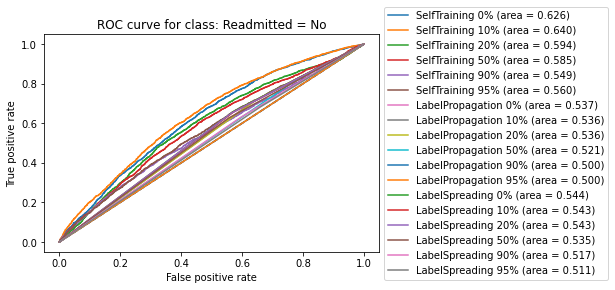

In [248]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')


plt.plot(fpr_selftraining0[0], tpr_selftraining0[0], label='SelfTraining 0% (area = {:.3f})'.format(roc_auc_training0[0]))
plt.plot(fpr_selftraining10[0], tpr_selftraining10[0], label='SelfTraining 10% (area = {:.3f})'.format(roc_auc_training10[0]))
plt.plot(fpr_selftraining20[0], tpr_selftraining20[0], label='SelfTraining 20% (area = {:.3f})'.format(roc_auc_training20[0]))
plt.plot(fpr_selftraining50[0], tpr_selftraining50[0], label='SelfTraining 50% (area = {:.3f})'.format(roc_auc_training50[0]))
plt.plot(fpr_selftraining90[0], tpr_selftraining90[0], label='SelfTraining 90% (area = {:.3f})'.format(roc_auc_training90[0]))
plt.plot(fpr_selftraining95[0], tpr_selftraining95[0], label='SelfTraining 95% (area = {:.3f})'.format(roc_auc_training95[0]))


plt.plot(fpr1_lp0, tpr1_lp0, label='LabelPropagation 0% (area = {:.3f})'.format(roc_auc_lp0[0]))
plt.plot(fpr1_lp10, tpr1_lp10, label='LabelPropagation 10% (area = {:.3f})'.format(roc_auc_lp10[0]))
plt.plot(fpr1_lp20, tpr1_lp20, label='LabelPropagation 20% (area = {:.3f})'.format(roc_auc_lp20[0]))
plt.plot(fpr1_lp50, tpr1_lp50, label='LabelPropagation 50% (area = {:.3f})'.format(roc_auc_lp50[0]))
plt.plot(fpr1_lp90, tpr1_lp90, label='LabelPropagation 90% (area = {:.3f})'.format(roc_auc_lp90[0]))
plt.plot(fpr1_lp95, tpr1_lp95, label='LabelPropagation 95% (area = {:.3f})'.format(roc_auc_lp95[0]))

plt.plot(fpr1_ls0, tpr1_ls0, label='LabelSpreading 0% (area = {:.3f})'.format(roc_auc_ls0[0]))
plt.plot(fpr1_ls10, tpr1_ls10, label='LabelSpreading 10% (area = {:.3f})'.format(roc_auc_ls10[0]))
plt.plot(fpr1_ls20, tpr1_ls20, label='LabelSpreading 20% (area = {:.3f})'.format(roc_auc_ls20[0]))
plt.plot(fpr1_ls50, tpr1_ls50, label='LabelSpreading 50% (area = {:.3f})'.format(roc_auc_ls50[0]))
plt.plot(fpr1_ls90, tpr1_ls90, label='LabelSpreading 90% (area = {:.3f})'.format(roc_auc_ls90[0]))
plt.plot(fpr1_ls95, tpr1_ls95, label='LabelSpreading 95% (area = {:.3f})'.format(roc_auc_ls95[0]))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for class: Readmitted = No')
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Here self-training 10% performs the best with 0.640 AUC. 

# ROC curve for Class Readmitted >30

All the roc curve for class >30 are drawn together to show the comparison.

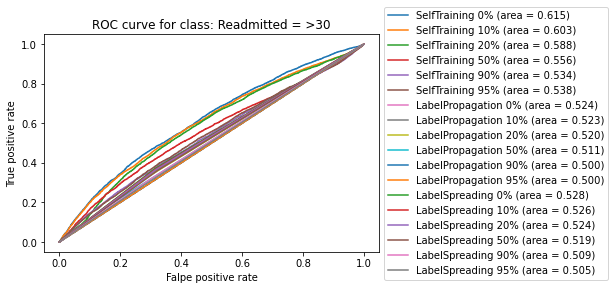

In [247]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_selftraining0[1], tpr_selftraining0[1], label='SelfTraining 0% (area = {:.3f})'.format(roc_auc_training0[1]))
plt.plot(fpr_selftraining10[1], tpr_selftraining10[1], label='SelfTraining 10% (area = {:.3f})'.format(roc_auc_training10[1]))
plt.plot(fpr_selftraining20[1], tpr_selftraining20[1], label='SelfTraining 20% (area = {:.3f})'.format(roc_auc_training20[1]))
plt.plot(fpr_selftraining50[1], tpr_selftraining50[1], label='SelfTraining 50% (area = {:.3f})'.format(roc_auc_training50[1]))
plt.plot(fpr_selftraining90[1], tpr_selftraining90[1], label='SelfTraining 90% (area = {:.3f})'.format(roc_auc_training90[1]))
plt.plot(fpr_selftraining95[1], tpr_selftraining95[1], label='SelfTraining 95% (area = {:.3f})'.format(roc_auc_training95[1]))


plt.plot(fpr2_lp0, tpr2_lp0, label='LabelPropagation 0% (area = {:.3f})'.format(roc_auc_lp0[1]))
plt.plot(fpr2_lp10, tpr2_lp10, label='LabelPropagation 10% (area = {:.3f})'.format(roc_auc_lp10[1]))
plt.plot(fpr2_lp20, tpr2_lp20, label='LabelPropagation 20% (area = {:.3f})'.format(roc_auc_lp20[1]))
plt.plot(fpr2_lp50, tpr2_lp50, label='LabelPropagation 50% (area = {:.3f})'.format(roc_auc_lp50[1]))
plt.plot(fpr2_lp90, tpr2_lp90, label='LabelPropagation 90% (area = {:.3f})'.format(roc_auc_lp90[1]))
plt.plot(fpr2_lp95, tpr2_lp95, label='LabelPropagation 95% (area = {:.3f})'.format(roc_auc_lp95[1]))

plt.plot(fpr2_ls0, tpr2_ls0, label='LabelSpreading 0% (area = {:.3f})'.format(roc_auc_ls0[1]))
plt.plot(fpr2_ls10, tpr2_ls10, label='LabelSpreading 10% (area = {:.3f})'.format(roc_auc_ls10[1]))
plt.plot(fpr2_ls20, tpr2_ls20, label='LabelSpreading 20% (area = {:.3f})'.format(roc_auc_ls20[1]))
plt.plot(fpr2_ls50, tpr2_ls50, label='LabelSpreading 50% (area = {:.3f})'.format(roc_auc_ls50[1]))
plt.plot(fpr2_ls90, tpr2_ls90, label='LabelSpreading 90% (area = {:.3f})'.format(roc_auc_ls90[1]))
plt.plot(fpr2_ls95, tpr2_ls95, label='LabelSpreading 95% (area = {:.3f})'.format(roc_auc_ls95[1]))

plt.xlabel('Falpe positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for class: Readmitted = >30')
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


Here, self-training 0% which is a fully supervised techniques perform best. Apart from this the second best is self-training10%. From this we can infer that unlabeled data is not performing well for class > 30.

# ROC curve for Class Readmitted <30

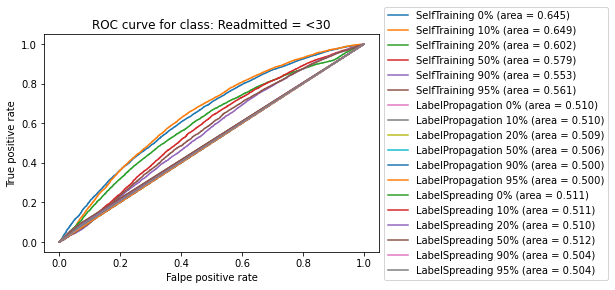

In [246]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_selftraining0[2], tpr_selftraining0[2], label='SelfTraining 0% (area = {:.3f})'.format(roc_auc_training0[2]))
plt.plot(fpr_selftraining10[2], tpr_selftraining10[2], label='SelfTraining 10% (area = {:.3f})'.format(roc_auc_training10[2]))
plt.plot(fpr_selftraining20[2], tpr_selftraining20[2], label='SelfTraining 20% (area = {:.3f})'.format(roc_auc_training20[2]))
plt.plot(fpr_selftraining50[2], tpr_selftraining50[2], label='SelfTraining 50% (area = {:.3f})'.format(roc_auc_training50[2]))
plt.plot(fpr_selftraining90[2], tpr_selftraining90[2], label='SelfTraining 90% (area = {:.3f})'.format(roc_auc_training90[2]))
plt.plot(fpr_selftraining95[2], tpr_selftraining95[2], label='SelfTraining 95% (area = {:.3f})'.format(roc_auc_training95[2]))

plt.plot(fpr3_lp0, tpr3_lp0, label='LabelPropagation 0% (area = {:.3f})'.format(roc_auc_lp0[2]))
plt.plot(fpr3_lp10, tpr3_lp10, label='LabelPropagation 10% (area = {:.3f})'.format(roc_auc_lp10[2]))
plt.plot(fpr3_lp20, tpr3_lp20, label='LabelPropagation 20% (area = {:.3f})'.format(roc_auc_lp20[2]))
plt.plot(fpr3_lp50, tpr3_lp50, label='LabelPropagation 50% (area = {:.3f})'.format(roc_auc_lp50[2]))
plt.plot(fpr3_lp90, tpr3_lp90, label='LabelPropagation 90% (area = {:.3f})'.format(roc_auc_lp90[2]))
plt.plot(fpr3_lp95, tpr3_lp95, label='LabelPropagation 95% (area = {:.3f})'.format(roc_auc_lp95[2]))

plt.plot(fpr3_ls0, tpr3_ls0, label='LabelSpreading 0% (area = {:.3f})'.format(roc_auc_ls0[2]))
plt.plot(fpr3_ls10, tpr3_ls10, label='LabelSpreading 10% (area = {:.3f})'.format(roc_auc_ls10[2]))
plt.plot(fpr3_ls20, tpr3_ls20, label='LabelSpreading 20% (area = {:.3f})'.format(roc_auc_ls20[2]))
plt.plot(fpr3_ls50, tpr3_ls50, label='LabelSpreading 50% (area = {:.3f})'.format(roc_auc_ls50[2]))
plt.plot(fpr3_ls90, tpr3_ls90, label='LabelSpreading 90% (area = {:.3f})'.format(roc_auc_ls90[2]))
plt.plot(fpr3_ls95, tpr3_ls95, label='LabelSpreading 95% (area = {:.3f})'.format(roc_auc_ls95[2]))


plt.xlabel('Falpe positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for class: Readmitted = <30')
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


Self-training10% has the best AUC. and if you see the results for all Label Propagation and label spreading they are performing so badly here. whereas selftraining10% has the highest AUC among all the classes. We can infer from this that in the minority class small percentage of the unlabeled data assist the self training classifier to improve their results.